# MNA - Master in Applied Artificial Intelligence
## Course: Fintech and Digital Innovation in Finance
### Course project part 1
#### Text embeddings and Technical Analysis on S&P 500 data (Section B)

---

**Student:** Emiliano Saucedo Arriola | A01659258  

**Date:** July 28th, 2025

---

# Introduction to financial technical analysis

## 📌 Objectives

By the end of this notebook, students will be able to:

1. **Access and Manipulate Financial Data:**
   - Use the `yfinance` library to retrieve historical stock prices for all companies in the S&P 500 index.

2. **Compute Key Technical Indicators:**
   - Calculate 50-day and 200-day moving averages for each stock in the index.

3. **Detect Trading Signals:**
   - Identify Golden Crosses and Death Crosses as described in technical analysis literature.

4. **Analyze Recent Market Behavior:**
   - Isolate and examine stocks that experienced technical signals (crosses) in the last 14 days.

5. **Visualize Price Trends and Volatility:**
   - Plot historical price movements along with moving averages, and compute volatility around signal dates.

6. **Interpret Technical Indicators in Context:**
   - Reflect on what Golden and Death Crosses signify and how traders may respond to them.

7. **Evaluate Strategy Viability:**
   - Discuss the strengths and limitations of using moving averages as a standalone trading strategy.

8. **Connect Technical Analysis to Broader Market Intelligence:**
   - Explore how sentiment analysis and news (covered in later sections) could complement technical signals.

9. **Develop Critical Thinking About Signal Reliability:**
   - Assess potential risks of false positives and propose improvements or filters to enhance signal accuracy.

10. **Engage in Strategic Reflection:**
    - Answer analytical questions aimed at understanding the utility, risks, and presentation of the strategy to a professional audience.


## Import and install librairies

In [1]:
# !pip install -q pandas yfinance lxml matplotlib

In [2]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re
import matplotlib.pyplot as plt
import numpy as np

## Get the list of stocks in the S&P 500 

In [3]:
# Read and print the stock tickers that make up S&P500
df_tickers = pd.read_html(
    'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
display(df_tickers)

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...
498,XYL,Xylem Inc.,Industrials,Industrial Machinery & Supplies & Components,"White Plains, New York",2011-11-01,1524472,2011
499,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
500,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
501,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927


In [4]:
ticker_list = df_tickers['Symbol'].tolist()
print(f"Sample tickers: {ticker_list[:5]}")

Sample tickers: ['MMM', 'AOS', 'ABT', 'ABBV', 'ACN']


## Get the closing price of all 500 stocks in the S&P 500 Index
Use the yfinance library to retrieve the close price of all 500 stocks in the index between 2024-05-01 and 2025-05-01
https://ranaroussi.github.io/yfinance/reference/yfinance.stock.html

In [5]:
start_date = '2024-05-01'
end_date = '2025-05-01'

In [6]:
# CODE HERE
# Use as many coding cells as you need

# Load closing prices 
# Make sure you end this coding section by displaying your results: display(df_close)

# Replace '.' with '-' in tickers to match format (e.g., 'BRK.B' -> 'BRK-B')
ticker_map = {ticker: ticker.replace('.', '-') for ticker in ticker_list}

# Join tickers into a space-separated string for yf.download
tickers_str = ' '.join(ticker_map.values())

# Download historical stock data using yfinance
df_all = yf.download(
    tickers=tickers_str,
    start=start_date,
    end=end_date,
    group_by='ticker',
    auto_adjust=True
)

# Create a DataFrame with closing prices using original ticker names
df_close = pd.DataFrame({
    ticker: df_all[ticker_map[ticker]]['Close']
    for ticker in ticker_list
    if ticker_map[ticker] in df_all.columns or ticker_map[ticker] in df_all
}).ffill().bfill()


[*********************100%***********************]  503 of 503 completed


In [7]:
display(df_close)

,MMM,AOS,ABT,ABBV,ACN,ADBE,AMD,AES,AFL,A,...,WMB,WTW,WDAY,WYNN,XEL,XYL,YUM,ZBRA,ZBH,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2024-05-01,95.778587,81.281319,103.735458,154.714767,293.442108,469.390015,144.270004,17.218019,82.391685,137.376282,...,36.111885,250.928604,244.960007,91.453209,51.484390,129.094406,132.078354,309.049988,118.202545,156.223282
2024-05-02,94.192665,82.027473,103.374352,153.844193,295.092773,476.570007,146.160004,17.938202,81.875328,136.217361,...,36.731380,248.751328,250.850006,93.958237,51.493958,134.052750,131.824631,312.709991,117.115036,164.827881
2024-05-03,94.523460,82.773605,103.354828,156.695114,298.403900,486.179993,150.600006,17.691822,81.066711,138.129059,...,36.855278,248.258743,255.779999,95.378410,51.934326,135.255371,131.112122,309.589996,120.278717,164.670197
2024-05-06,93.978600,83.598312,103.101074,155.681030,300.712860,493.589996,155.779999,17.890818,82.547562,139.278091,...,37.226978,249.322754,249.910004,96.522430,52.039635,137.217026,132.907913,315.790009,119.191208,163.566284
2024-05-07,92.956993,83.667038,103.618340,155.508820,305.232452,492.269989,154.429993,17.852917,82.498848,139.931839,...,37.274628,251.086227,249.429993,95.891258,52.671459,138.035202,132.644409,317.869995,120.051323,166.030380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-24,138.203125,64.968727,128.801849,178.825470,291.410004,360.910004,94.470001,9.941888,108.540672,106.795090,...,59.113911,306.132263,236.869995,81.371361,69.709930,115.241966,146.859604,244.080002,101.237473,151.792435
2025-04-25,136.650742,64.660294,128.274216,184.466751,293.390015,367.720001,96.650002,9.873120,107.347260,106.056648,...,58.538738,301.276978,239.529999,81.900002,68.430580,115.730400,146.580978,246.240005,101.247452,152.958542
2025-04-28,137.257751,64.451363,128.951172,190.692963,293.250000,368.619995,96.389999,10.010655,107.894241,106.645409,...,59.163494,302.244049,239.820007,81.989769,69.005791,115.550972,147.028778,243.490005,101.496803,153.058212


## Identify Golden and Death Crosses

### Get Moving Averages 50 days and 200 days

In [8]:
# CODE HERE
# Use as many coding cells as you need

# Compute moving averages
# Make sure you end this coding section by displaying your results: display(df_ma50), display(df_ma200)
df_ma50 = df_close.rolling(window=50).mean()
df_ma200 = df_close.rolling(window=200).mean()

In [9]:
display(df_ma50.tail())

,MMM,AOS,ABT,ABBV,ACN,ADBE,AMD,AES,AFL,A,...,WMB,WTW,WDAY,WYNN,XEL,XYL,YUM,ZBRA,ZBH,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2025-04-24,143.654412,65.219248,129.695852,194.882048,322.755805,401.392800,100.5516,11.069880,106.393994,118.589774,...,56.881933,325.769607,243.521401,82.616266,68.725403,120.092335,151.386326,277.851799,105.303733,158.931158
2025-04-25,143.439081,65.214074,129.675178,194.779480,320.885378,399.492000,100.2502,11.069094,106.504835,117.960953,...,56.975109,325.452575,243.153601,82.695181,68.768236,119.825021,151.415763,275.718199,105.358225,158.535975
2025-04-28,143.238862,65.189798,129.642279,194.792594,318.998219,397.680000,99.9418,11.070076,106.604067,117.376369,...,57.028886,325.088865,242.747401,82.734114,68.802902,119.530667,151.409784,274.119598,105.399390,158.320589
2025-04-29,143.035060,65.205716,129.652079,194.840304,317.245909,395.896400,99.6010,11.078721,106.720124,116.839011,...,57.092296,324.750376,242.454201,82.593967,68.855058,119.324127,151.419251,272.873398,105.448960,158.289488
2025-04-30,142.834443,65.255185,129.675380,194.853134,315.515956,394.113801,99.2624,11.073023,106.819574,116.293892,...,57.117771,324.479385,242.039801,82.381536,68.909186,119.126358,151.498900,271.258199,105.470672,158.298383


In [10]:
display(df_ma200.tail())

,MMM,AOS,ABT,ABBV,ACN,ADBE,AMD,AES,AFL,A,...,WMB,WTW,WDAY,WYNN,XEL,XYL,YUM,ZBRA,ZBH,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2025-04-24,132.609984,73.531205,116.973859,183.261853,340.475851,478.509449,131.58170,13.862820,104.768169,133.080366,...,51.156786,303.742410,247.403701,85.165791,64.041626,125.549299,136.723923,346.199799,106.728763,172.881444
2025-04-25,132.804895,73.458212,117.119244,183.380334,340.478539,477.517949,131.17945,13.828417,104.869224,132.988337,...,51.245132,303.976908,247.485901,85.156247,64.130068,125.467794,136.835707,345.854800,106.711042,172.787551
2025-04-28,132.993142,73.373081,117.261134,183.529515,340.493397,476.538299,130.74160,13.793564,104.966743,132.891064,...,51.336073,304.212189,247.569601,85.151355,64.220807,125.371801,136.937422,345.453200,106.688920,172.697852
2025-04-29,133.175987,73.283924,117.402337,183.676030,340.515408,475.605049,130.31220,13.756137,105.053982,132.778129,...,51.426243,304.425549,247.652501,85.139760,64.309746,125.281706,137.037121,345.091850,106.665544,172.596478
2025-04-30,133.357501,73.192076,117.544590,183.828657,340.478450,474.684699,129.89090,13.715756,105.140541,132.658895,...,51.509465,304.654057,247.727401,85.115950,64.397867,125.198611,137.141726,344.717500,106.640987,172.493530


### Detecting Golden and Death Crosses in the last 14 days

In [11]:
# CODE HERE
# Use as many coding cells as you need

def detect_crosses(df_ma50, df_ma200, days=14):
    """
    Detects golden and death crosses in moving averages in the last `days` window.
    Args:
        df_ma50 (pd.DataFrame): DataFrame with 50-day moving averages.
        df_ma200 (pd.DataFrame): DataFrame with 200-day moving averages.
        days (int): Number of days to look back for crosses.
    Returns:
        pd.DataFrame: DataFrame with detected crosses, including ticker, date, and type of cross.
    """
    crosses = []

    # Check for crosses within the last `days` window
    for ticker in df_ma50.columns:
        ma50 = df_ma50[ticker]
        ma200 = df_ma200[ticker]

        # Difference between MA50 and MA200
        diff = ma50 - ma200

        # Look only at the last `days` + 1 days to compare changes
        recent_diff = diff[-(days + 1):]  # +1 to compare current and previous day

        for i in range(1, len(recent_diff)):
            prev = recent_diff.iloc[i - 1]
            curr = recent_diff.iloc[i]
            date = recent_diff.index[i]

            if pd.notna(prev) and pd.notna(curr):
                # Golden Cross: MA50 crosses above MA200
                if prev < 0 and curr > 0:
                    crosses.append({'TICKER': ticker, 'DATE': date, 'CROSS': 'GOLDEN'})
                # Death Cross: MA50 crosses below MA200
                elif prev > 0 and curr < 0:
                    crosses.append({'TICKER': ticker, 'DATE': date, 'CROSS': 'DEATH'})

    return pd.DataFrame(crosses)

In [12]:
# use the display function to show as many intermediary results
# for example display(df_golden_cross_14d)

# Detect crosses in the last 14 days
df_crosses_14d = detect_crosses(df_ma50, df_ma200, days=14)
display(df_crosses_14d)

,TICKER,DATE,CROSS
0,ACN,2025-04-10,DEATH
1,APD,2025-04-21,DEATH
2,AMZN,2025-04-22,DEATH
3,AXP,2025-04-22,DEATH
4,AMT,2025-04-21,GOLDEN
...,...,...,...
67,VST,2025-04-30,DEATH
68,WAB,2025-04-21,DEATH
69,DIS,2025-04-22,DEATH
70,WAT,2025-04-28,DEATH


In [13]:
# use the display function to show as many intermediary results
# for example display(df_death_cross_14d)

# ============= Golden crosses =============
df_golden_cross_14d = df_crosses_14d[df_crosses_14d['CROSS'] == 'GOLDEN'].sort_values(by='DATE')
display(df_golden_cross_14d)

,TICKER,DATE,CROSS
45,NEM,2025-04-14,GOLDEN
23,EW,2025-04-17,GOLDEN
4,AMT,2025-04-21,GOLDEN
36,KDP,2025-04-21,GOLDEN
57,SJM,2025-04-25,GOLDEN
42,MOH,2025-04-28,GOLDEN
43,MDLZ,2025-04-28,GOLDEN
55,SBAC,2025-04-29,GOLDEN
13,CI,2025-04-30,GOLDEN
35,INVH,2025-04-30,GOLDEN


In [14]:
# ============= Death crosses ============= 
df_death_cross_14d = df_crosses_14d[df_crosses_14d['CROSS'] == 'DEATH'].sort_values(by='DATE')
display(df_death_cross_14d)

,TICKER,DATE,CROSS
0,ACN,2025-04-10,DEATH
47,NCLH,2025-04-10,DEATH
25,EOG,2025-04-10,DEATH
22,DOV,2025-04-10,DEATH
64,TFC,2025-04-11,DEATH
...,...,...,...
29,GDDY,2025-04-28,DEATH
15,CTSH,2025-04-30,DEATH
17,GLW,2025-04-30,DEATH
67,VST,2025-04-30,DEATH


#### Golden crosses
List the first top companies in alphabetical order (by there symbol or ticker) that had a golden cross in the last 14 days:

In [15]:
top_golden_crosses = sorted(df_golden_cross_14d['TICKER'].unique())[:10]
print("Top 10 companies with golden crosses in the last 14 days:")
for ticker in top_golden_crosses:
    print(f"    - {ticker}")


Top 10 companies with golden crosses in the last 14 days:
    - AMT
    - CI
    - EW
    - INVH
    - KDP
    - MDLZ
    - MOH
    - NEM
    - SBAC
    - SJM


Over the past 14 days, the first 10 companies (ordered alphabetically by ticker) that had a golden cross are: **AMT**, **CI**, **EW**, **INVH**, **KDP**, **MDLZ**, **MOH**, **NEM**, **SBAC**, and **SJM**.

#### Death crosses
List the first 10 companies in alphabetical order (by there symbol or ticker) that had a death cross in the last 14 days: 

In [16]:
top_death_crosses = sorted(df_death_cross_14d['TICKER'].unique())[:10]
print("Top 10 companies with death crosses in the last 14 days:")
for ticker in top_death_crosses:
    print(f"    - {ticker}")


Top 10 companies with death crosses in the last 14 days:
    - ACN
    - ADSK
    - AME
    - AMP
    - AMZN
    - APD
    - APO
    - AXP
    - BAC
    - BLK


YOUR WRITTEN RESPONSE HERE

The first 10 companies that experienced a death cross in the last 14 days are: **ACN**, **ADSK**, **AME**, **AMP**, **AMZN**, **APD**, **APO**, **AXP**, **BAC**, and **BLK**.

### Visualization of the results
(in alphabetical order)

In [17]:
def plot_crosses(ticker, df_close, df_ma50, df_ma200, cross_dates=None, window=60):
    """
    Show a plot of stock price with 50-day and 200-day moving averages.

    Args:
        ticker (str): The stock symbol.
        df_close (DataFrame): Closing prices for all tickers.
        df_ma50 (DataFrame): 50-day moving averages.
        df_ma200 (DataFrame): 200-day moving averages.
        cross_dates (list): Dates where a crossover happened for this ticker.
        window (int): How many recent days to include in the chart.
    """
    if ticker not in df_close.columns:
        print(f"Ticker {ticker} not found in data.")
        return

    # Get the last `window` days of data for this ticker
    prices = df_close[ticker].dropna().tail(window)
    ma_50 = df_ma50[ticker].dropna().tail(window)
    ma_200 = df_ma200[ticker].dropna().tail(window)

    # Create the plot
    plt.figure(figsize=(12, 6))
    plt.plot(prices.index, prices, label="Close Price", color='black')
    plt.plot(ma_50.index, ma_50, label="50-day MA", color='#2196F3', linestyle='--')
    plt.plot(ma_200.index, ma_200, label="200-day MA", color='#E9C46A', linestyle='--')

    # Mark cross points if available
    if cross_dates:
        for date_str in cross_dates:
            date = pd.to_datetime(date_str)
            if date in prices.index:
                plt.axvline(x=date, color='red', linestyle=':', alpha=0.7)
                plt.text(date, prices.max()*0.95, 'Cross', color='red', rotation=90, fontsize=9)

    plt.title(f"{ticker} — Stock Price with Moving Averages")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [18]:
def show_multiple_crosses(df_close, df_ma50, df_ma200, crosses_df, cross_type="Golden Cross", top_n=10):
    """
    Plot moving average crosses for several tickers.

    Args:
        df_close (DataFrame): Close price data.
        df_ma50 (DataFrame): 50-day MA.
        df_ma200 (DataFrame): 200-day MA.
        crosses_df (DataFrame): DataFrame with TICKER and DATE columns.
        cross_type (str): Either 'Golden Cross' or 'Death Cross'.
        top_n (int): Number of tickers to show.
    """
    # Make sure the type is valid
    if cross_type not in ["Golden Cross", "Death Cross"]:
        print("Invalid cross type.")
        return

    # Sort and get the first N tickers alphabetically
    tickers = sorted(crosses_df["TICKER"].unique())[:top_n]

    print(f"Showing {cross_type} plots for {top_n} tickers:")

    for ticker in tickers:
        # Get the list of cross dates for this ticker
        cross_dates = crosses_df[crosses_df["TICKER"] == ticker]["DATE"].tolist()
        print(f"\nPlotting {ticker}...")
        plot_crosses(ticker, df_close, df_ma50, df_ma200, cross_dates)


Showing Golden Cross plots for 10 tickers:

Plotting AMT...


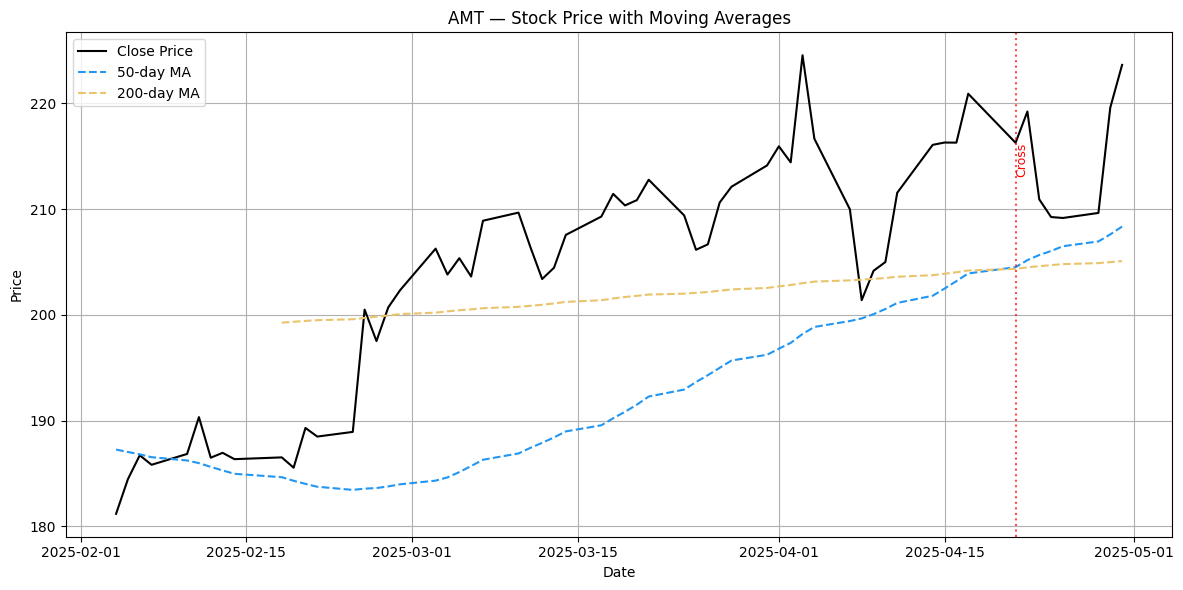


Plotting CI...


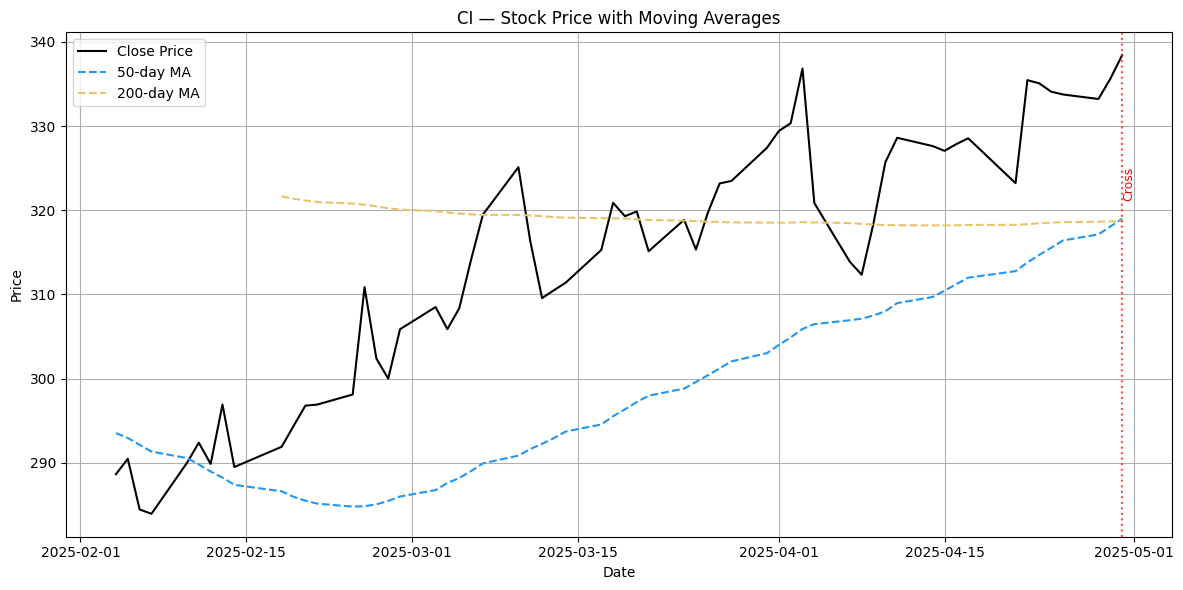


Plotting EW...


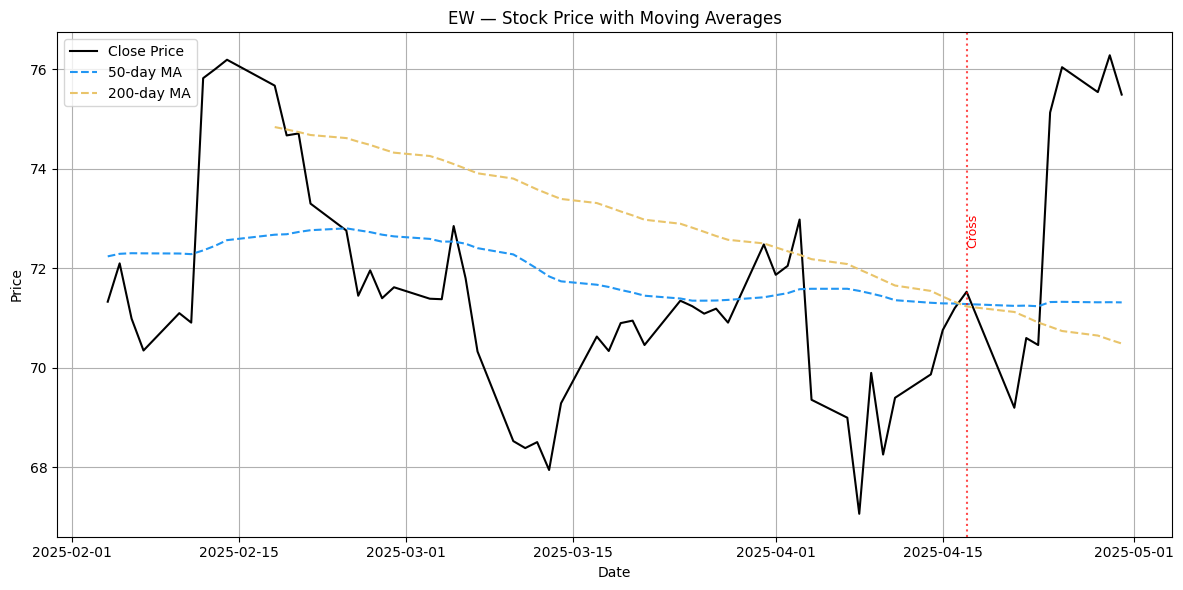


Plotting INVH...


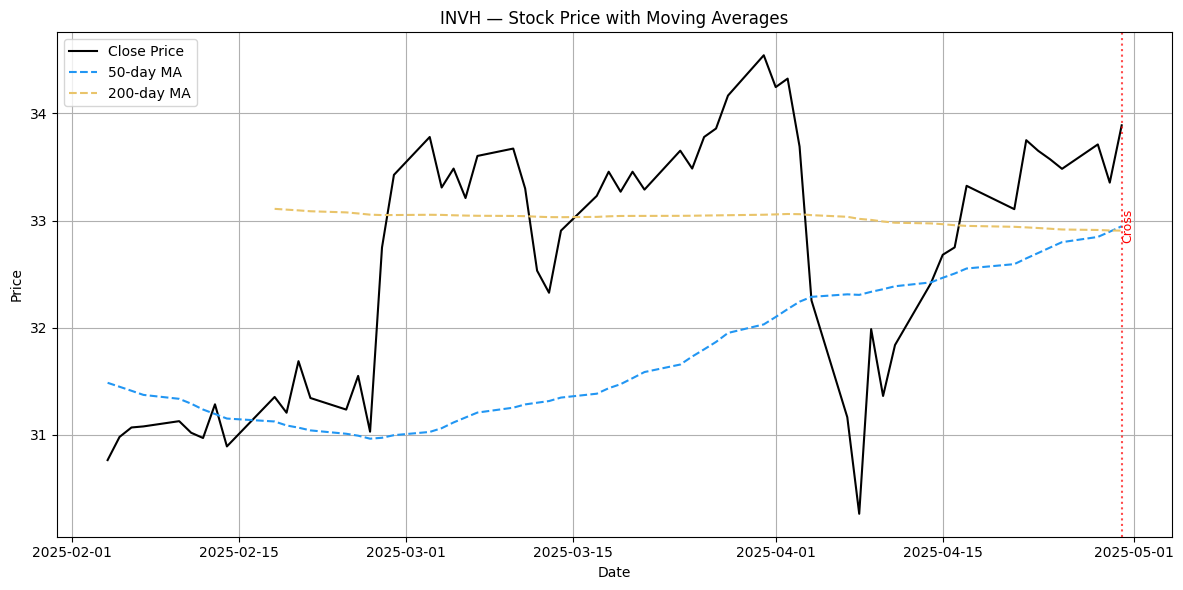


Plotting KDP...


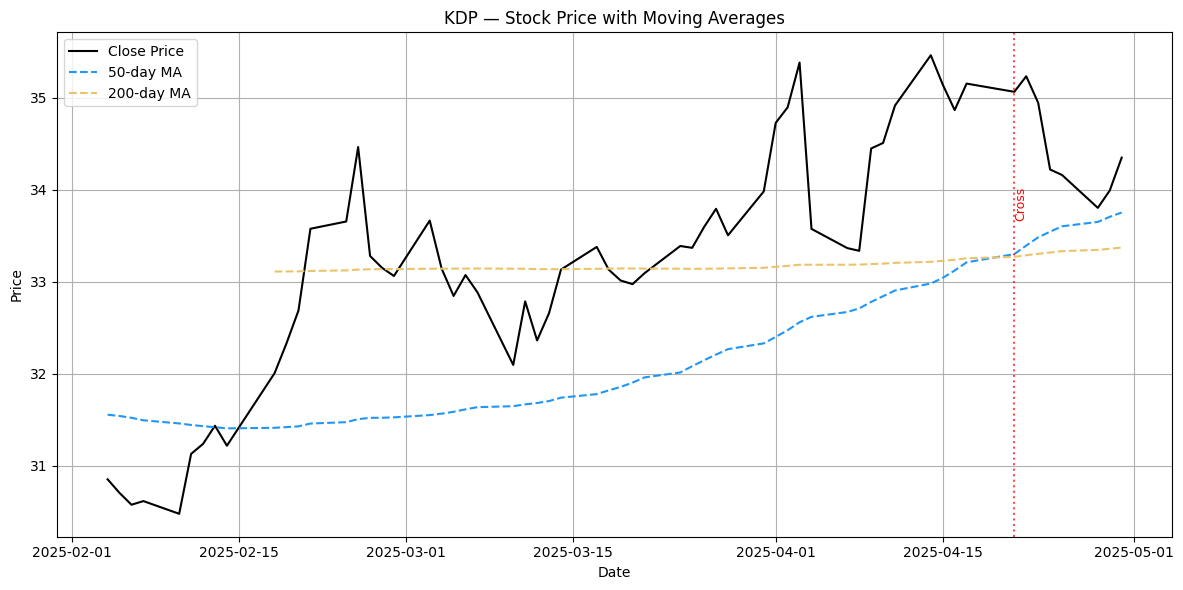


Plotting MDLZ...


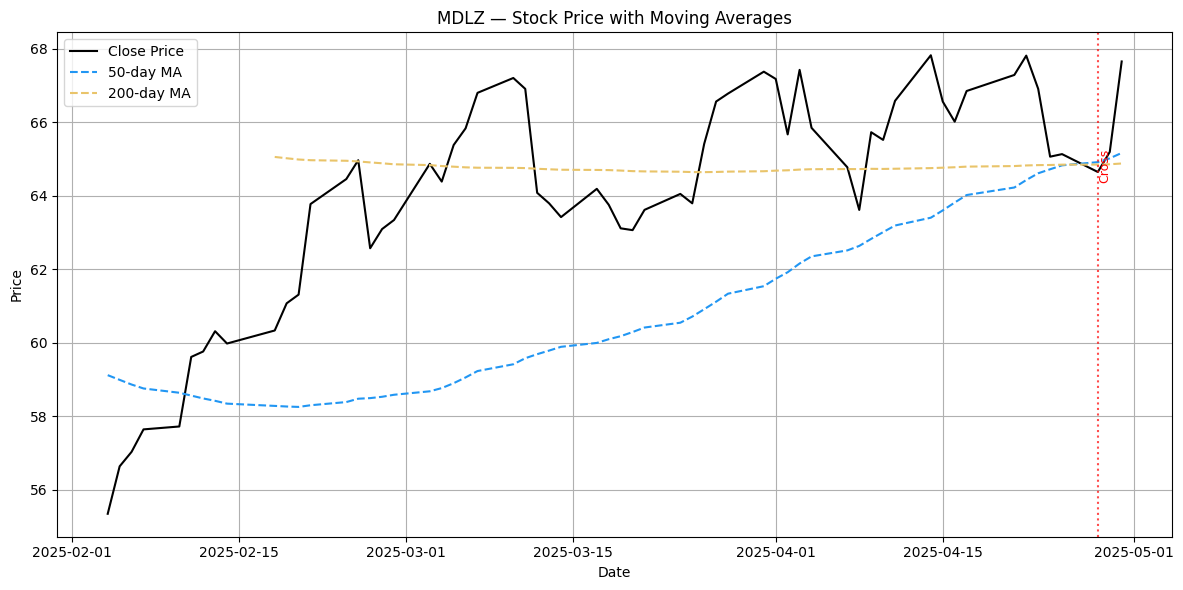


Plotting MOH...


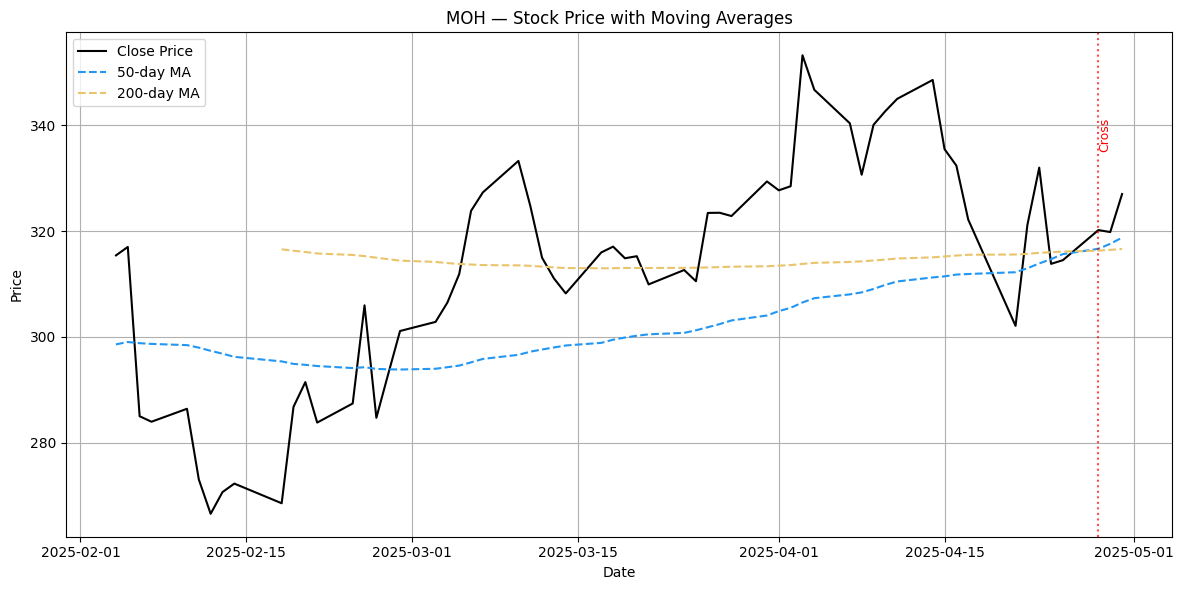


Plotting NEM...


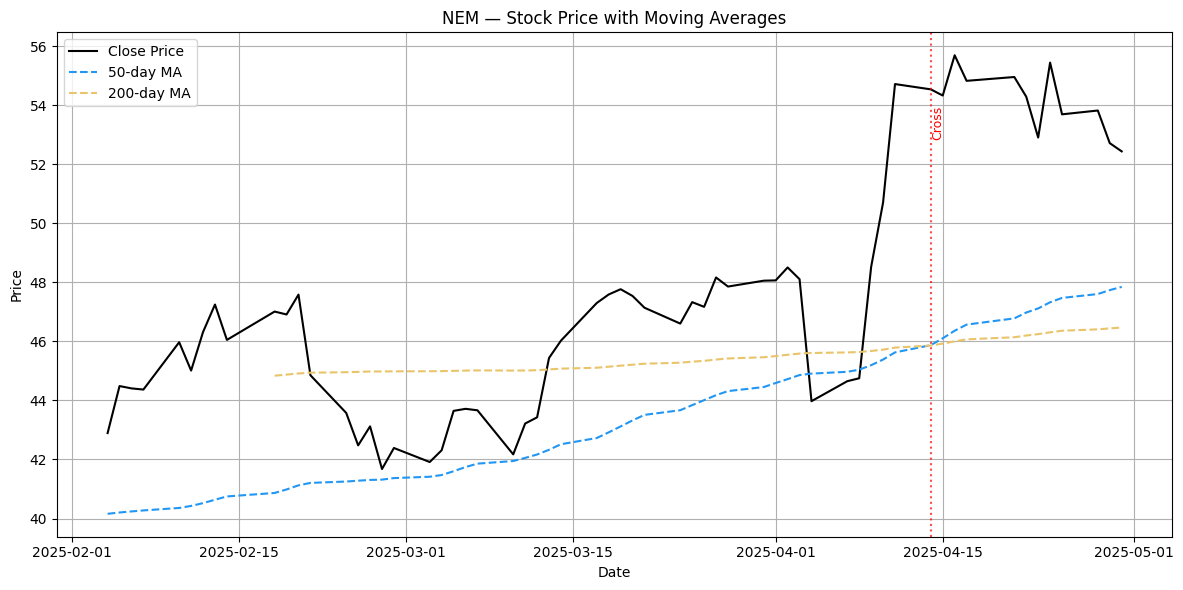


Plotting SBAC...


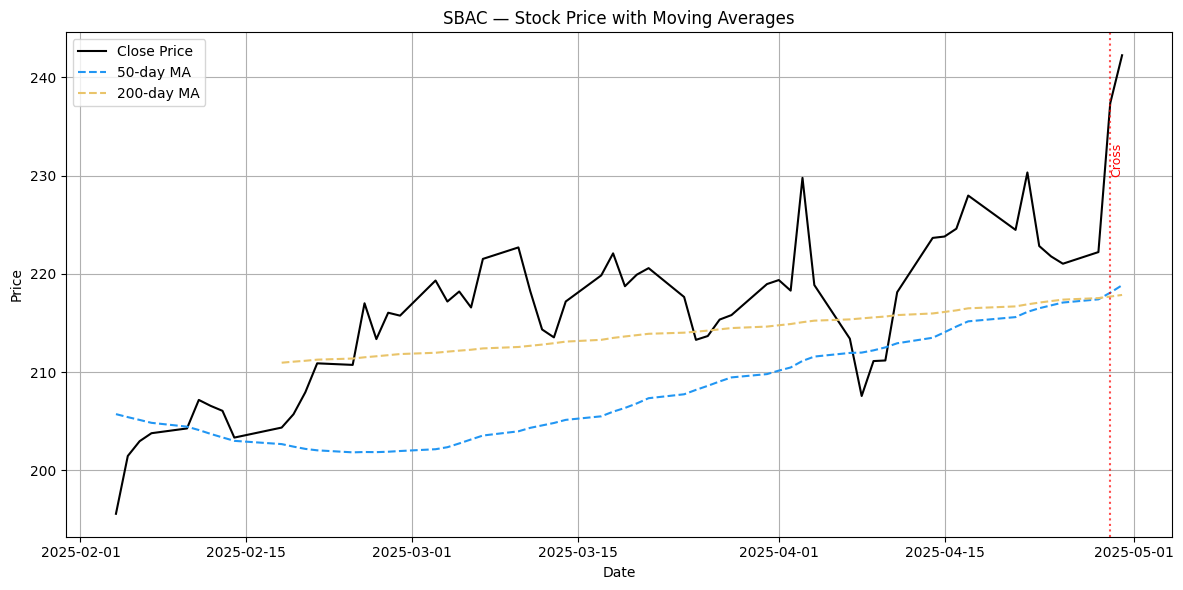


Plotting SJM...


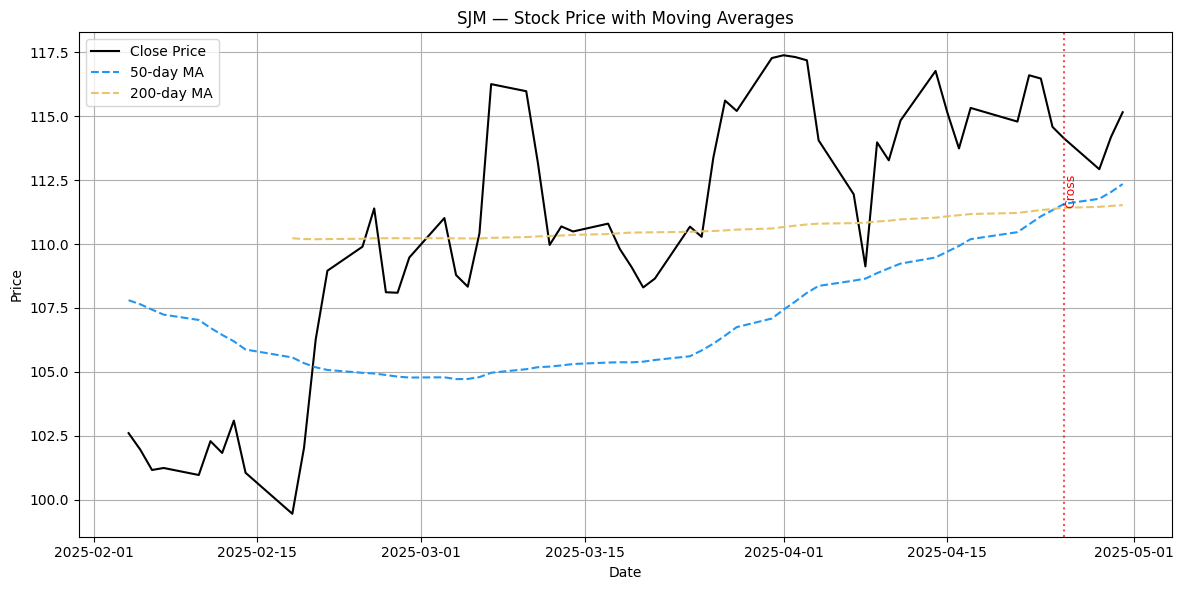

In [19]:
show_multiple_crosses(df_close, df_ma50, df_ma200, df_golden_cross_14d, cross_type="Golden Cross", top_n=10)

Showing Death Cross plots for 10 tickers:

Plotting ACN...


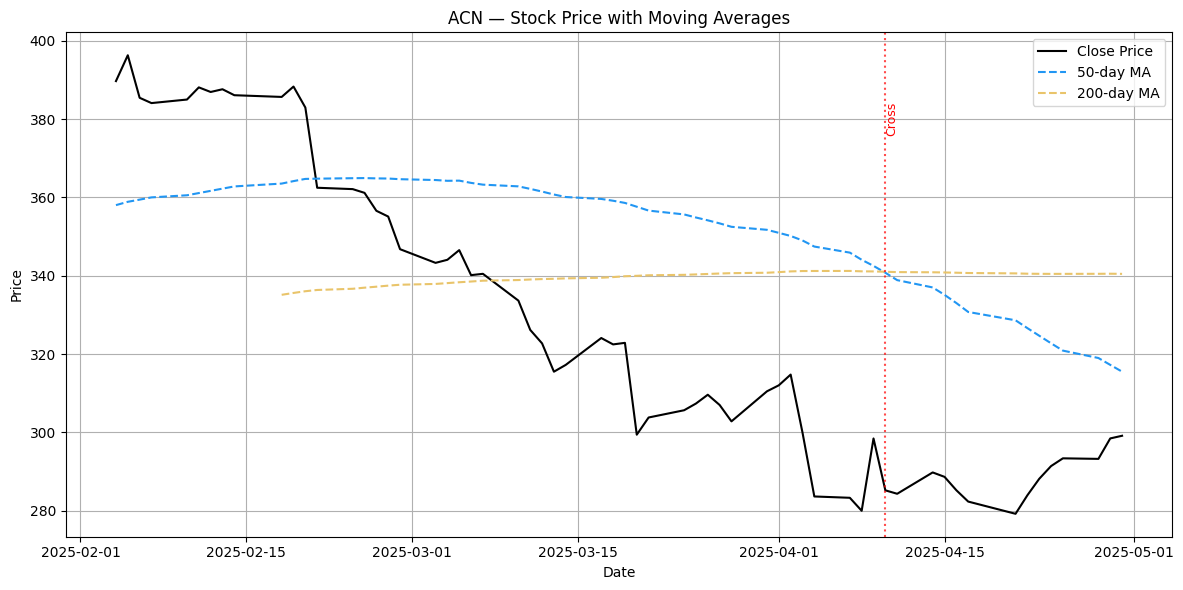


Plotting ADSK...


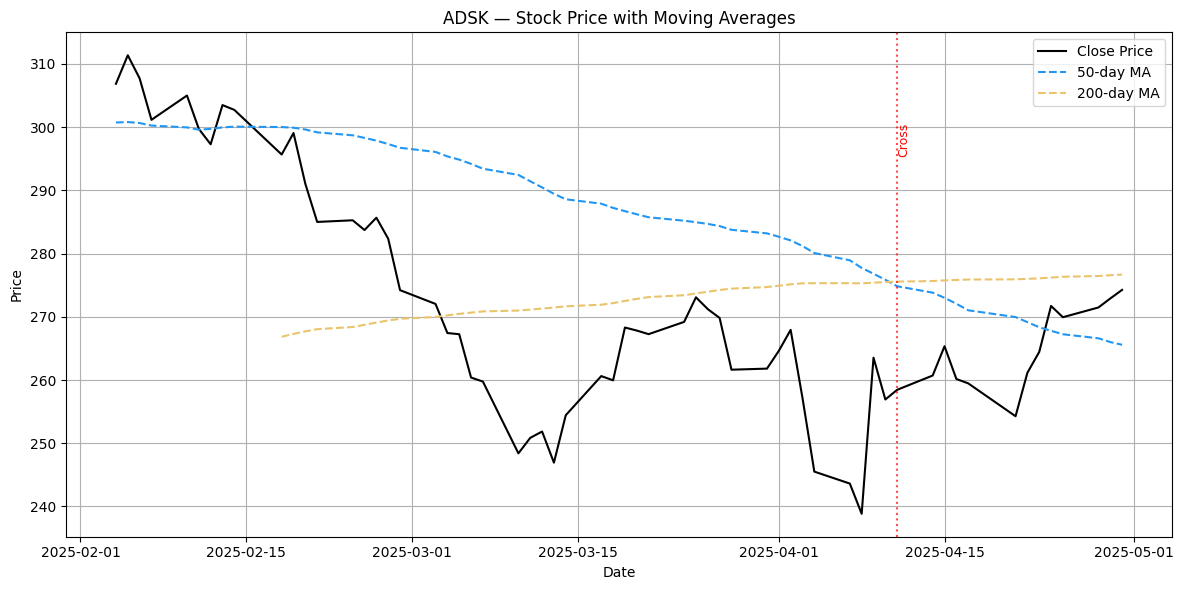


Plotting AME...


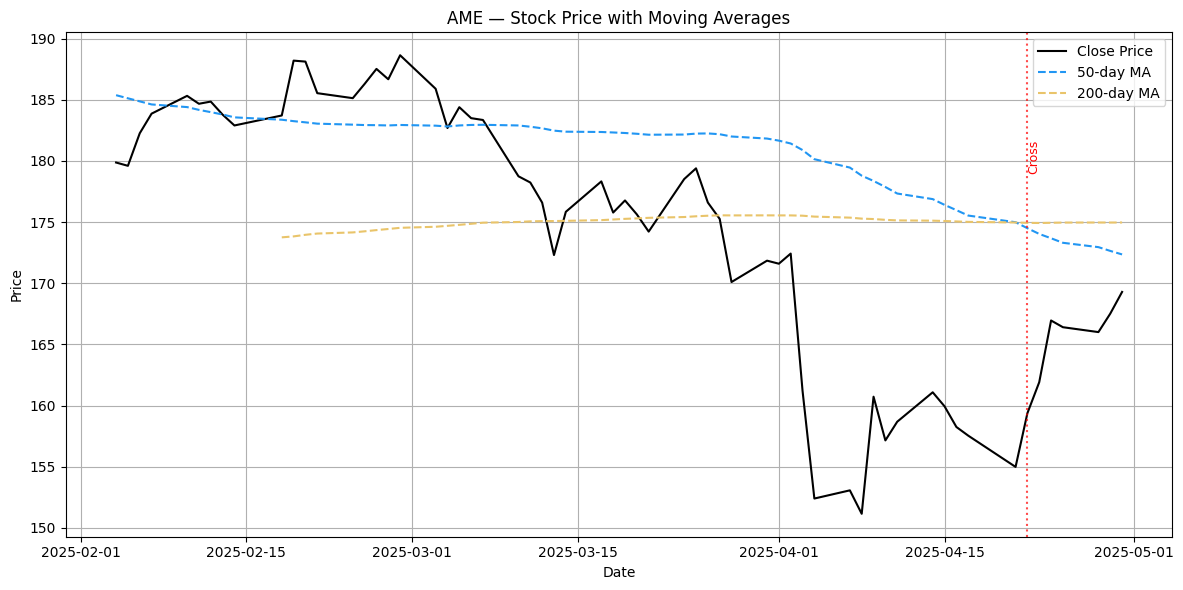


Plotting AMP...


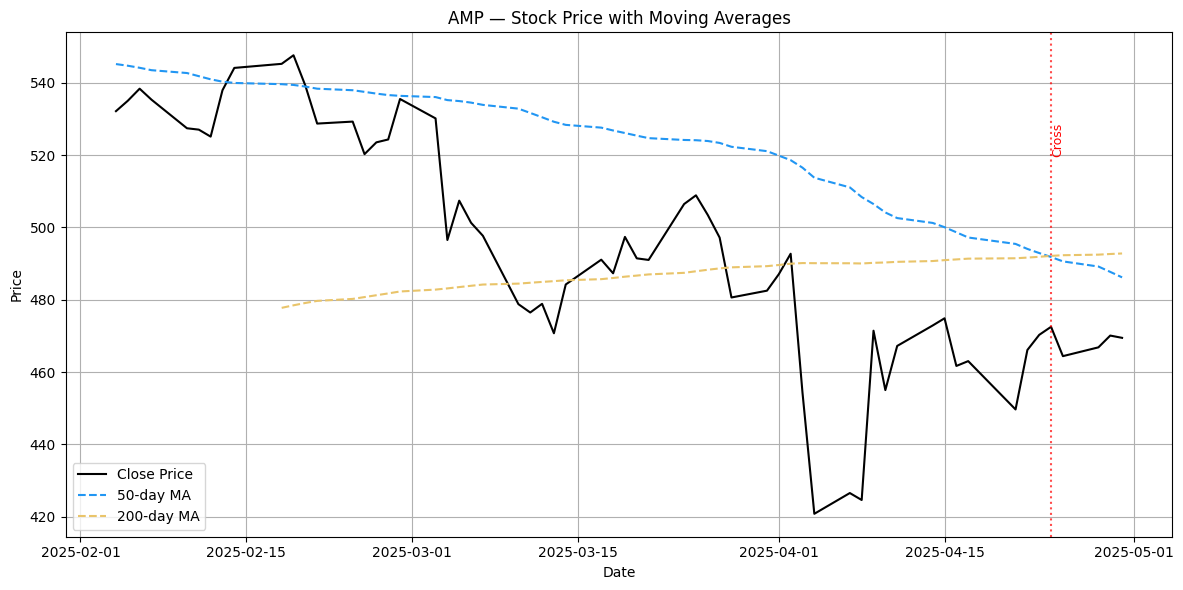


Plotting AMZN...


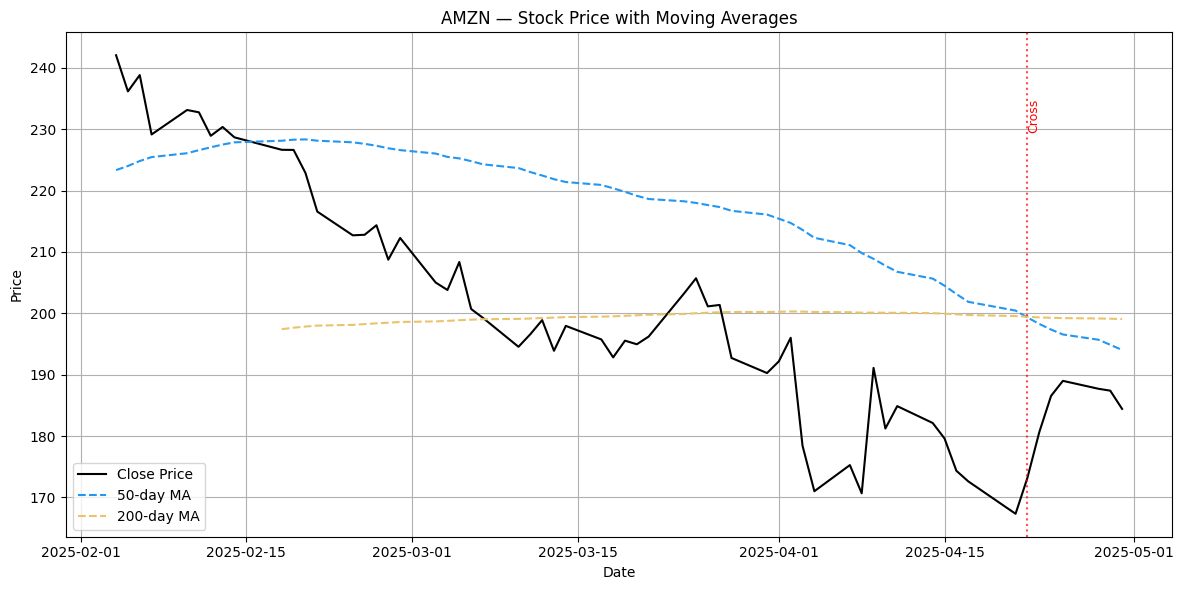


Plotting APD...


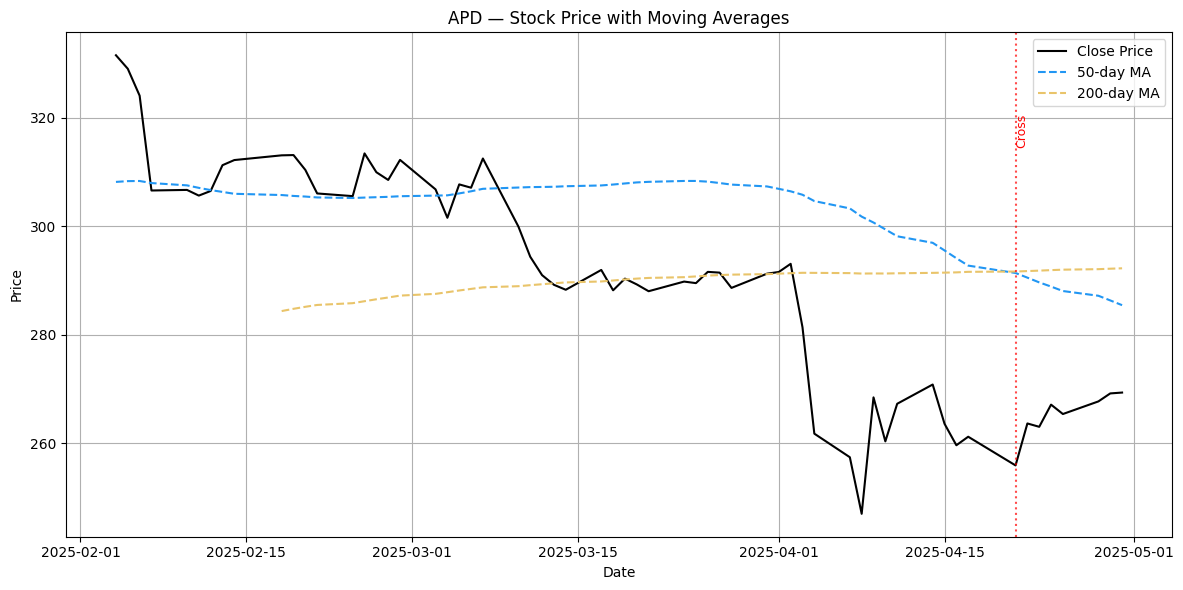


Plotting APO...


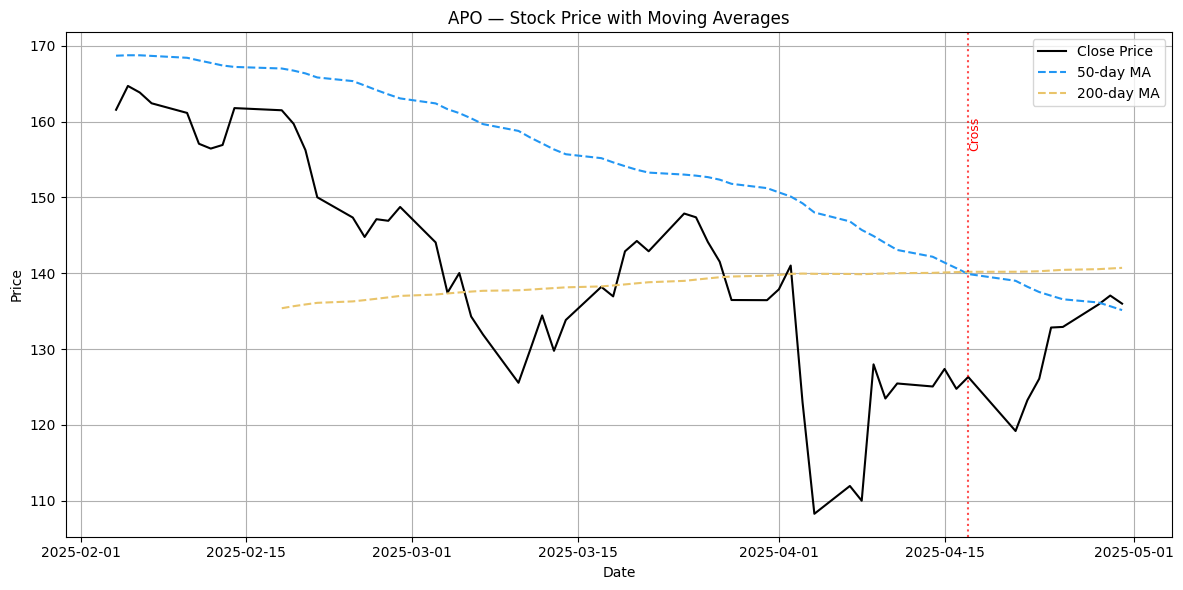


Plotting AXP...


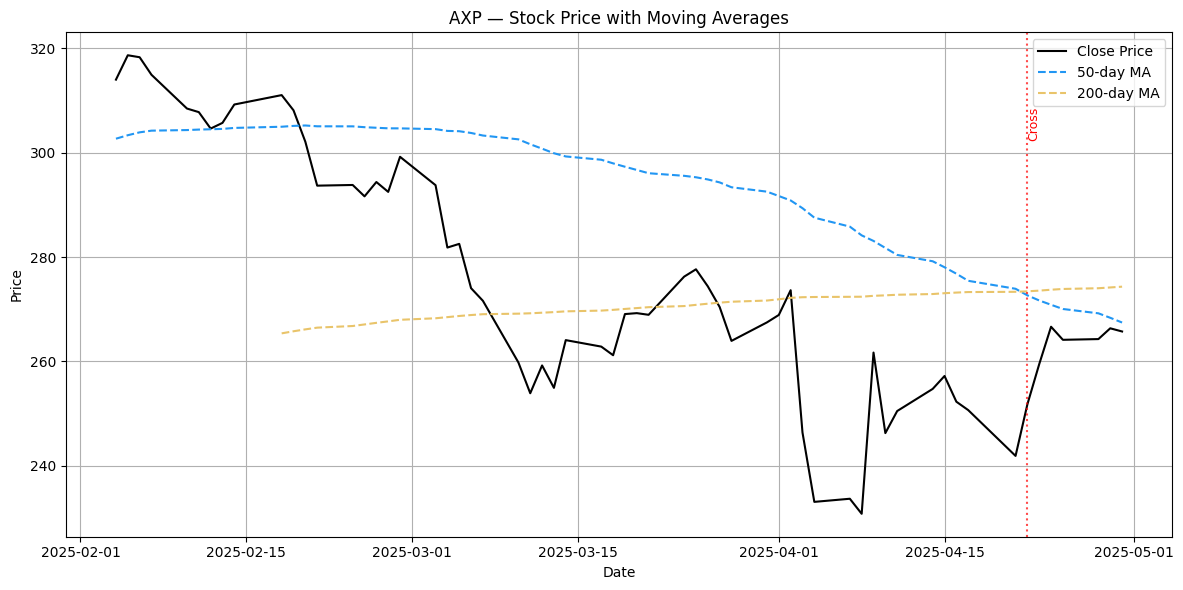


Plotting BAC...


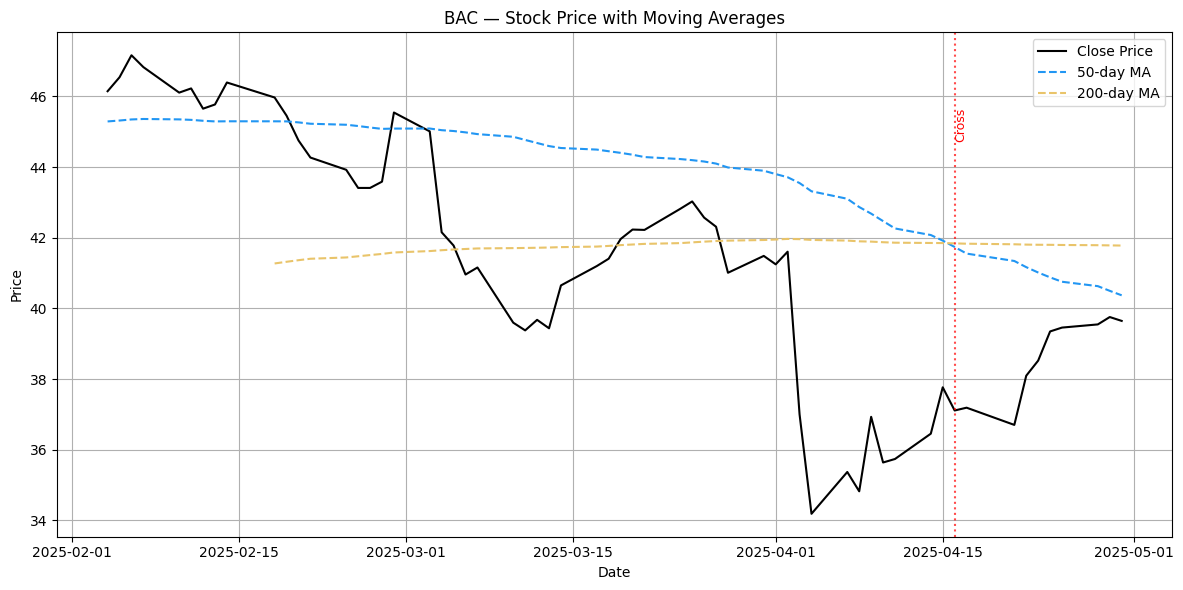


Plotting BLK...


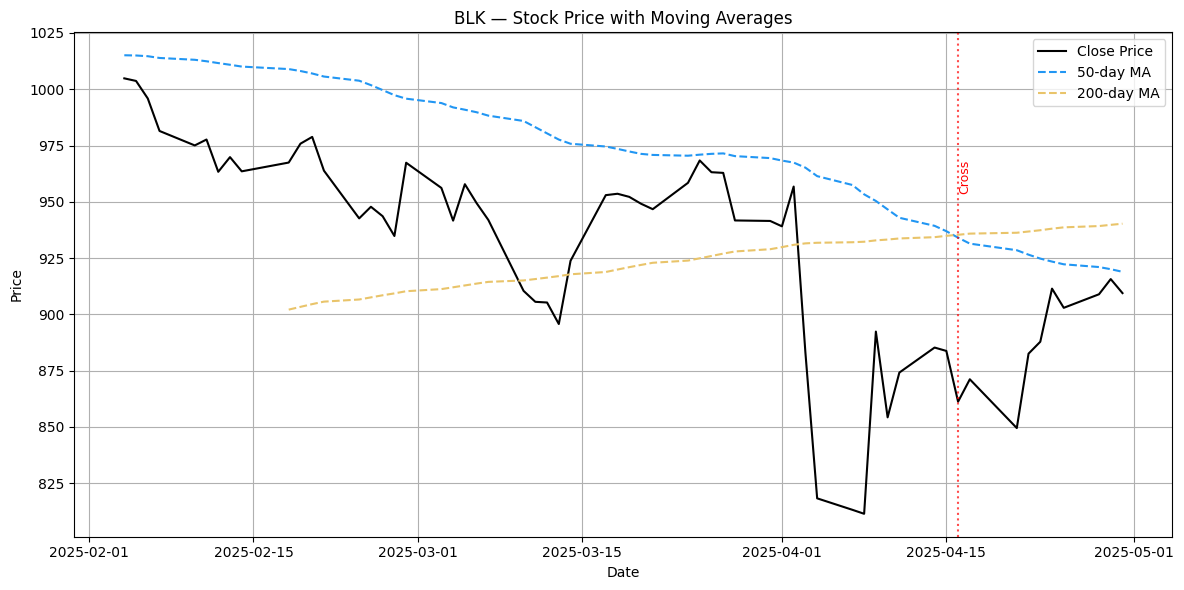

In [20]:
show_multiple_crosses(df_close, df_ma50, df_ma200, df_death_cross_14d, cross_type="Death Cross", top_n=10)

#### Compute the volatility of every stock and print it in the title of each plot 

In [21]:
# CODE HERE
# Use as many coding cells as you need

# Compute the volatility of every stock in the S&P 500 

# Compute daily returns
df_returns = df_close.pct_change()

# Compute annualized volatility (252 trading days)
volatility = df_returns.std() * np.sqrt(252)
display(volatility.sort_values(ascending=False).head(10))

SMCI    1.133066
COIN    0.837647
VST     0.754744
PLTR    0.724473
TSLA    0.722116
MRNA    0.694603
CEG     0.693040
MPWR    0.662670
ENPH    0.644402
MU      0.635402
dtype: float64

#### Plot top 10 stocks that had Golden Crosses in the last 14 days

- You should have 10 plots (use a for loop) for every stock in the top 10 (in alphabetical order)
- For each plot, put the volatility of the stock in the title of the plot

In [22]:
def plot_crosses_with_volatility(ticker, df_close, df_ma50, df_ma200, volatility, cross_dates, cross_type):
    """
    Plot the stock's closing price along with its 50-day and 200-day moving averages,
    highlighting crossover points and displaying volatility in the plot title.

    Args:
        ticker (str): Stock symbol
        df_close (DataFrame): Closing prices for all tickers
        df_ma50 (DataFrame): 50-day moving averages
        df_ma200 (DataFrame): 200-day moving averages
        volatility (Series): Annualized volatility per ticker
        cross_dates (list of str): Dates where a Golden or Death cross occurred
        cross_type (str): Type of cross to display ('Golden Cross' or 'Death Cross')
    """
    # Create the plot
    plt.figure(figsize=(12, 6))

    # Plot closing price and moving averages
    plt.plot(df_close[ticker], label="Close", color='black', linewidth=1)
    plt.plot(df_ma50[ticker], label="50-day MA", linestyle='--', color='#2a9d8f')
    plt.plot(df_ma200[ticker], label="200-day MA", linestyle='--', color='#e76f51')

    # Highlight crossover dates
    color = 'green' if cross_type == "Golden Cross" else 'red'
    for date in cross_dates:
        plt.axvline(pd.to_datetime(date), color=color, linestyle=':', alpha=0.6)

    # Format title with volatility info
    vol_value = volatility.get(ticker, np.nan)
    vol_label = f"{vol_value:.2%}" if not np.isnan(vol_value) else "N/A"
    plt.title(f"{ticker} — {cross_type} — Volatility: {vol_label}")

    # Final plot setup
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


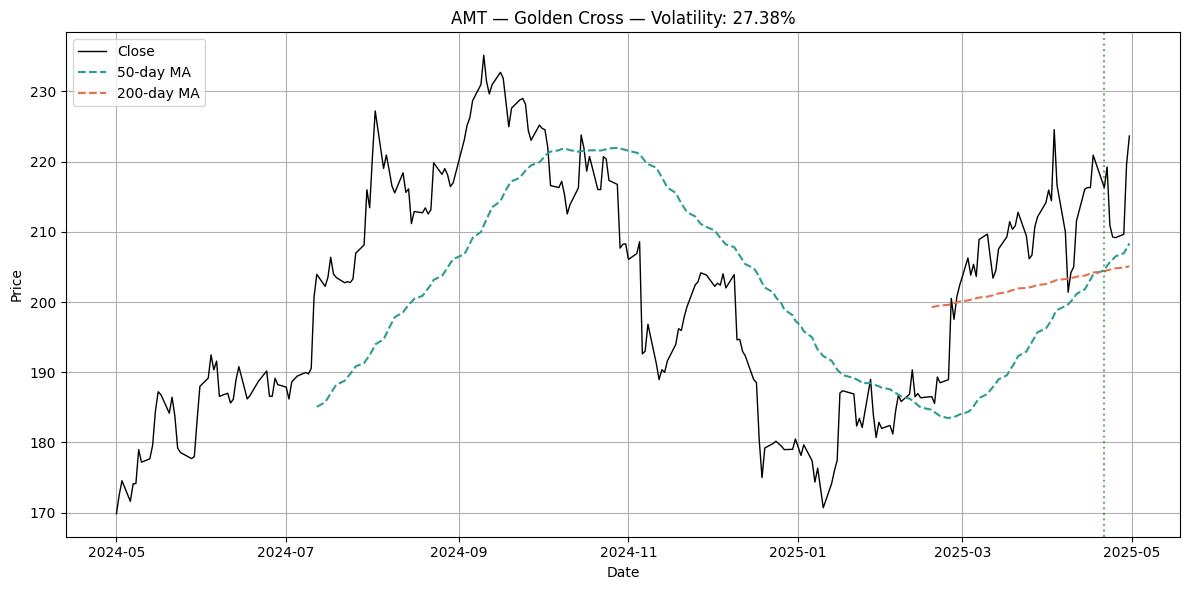

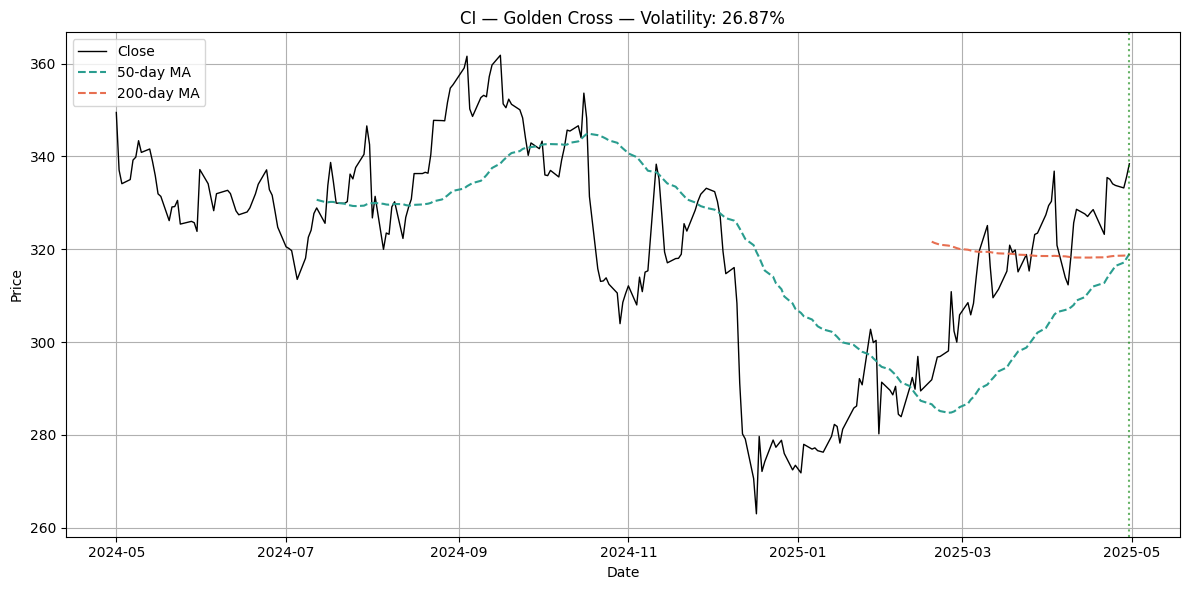

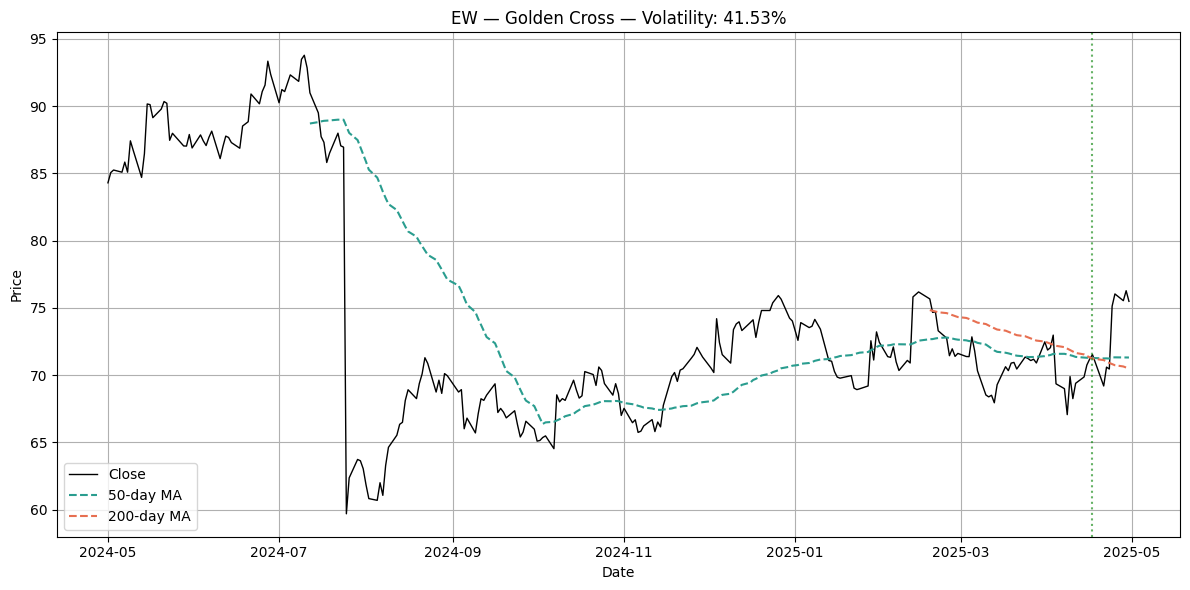

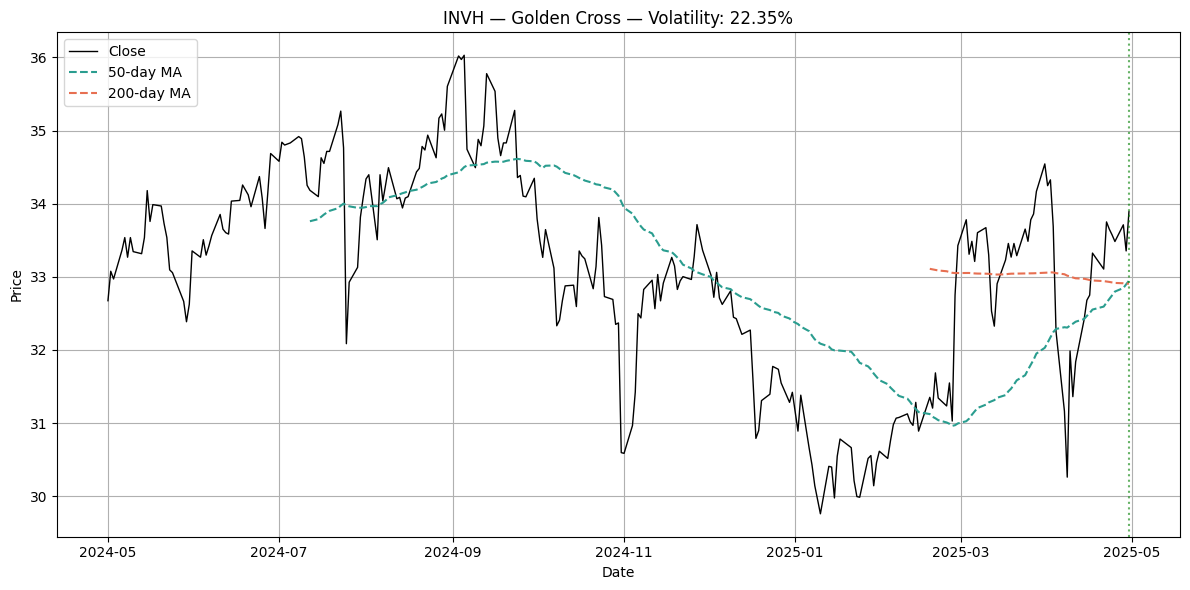

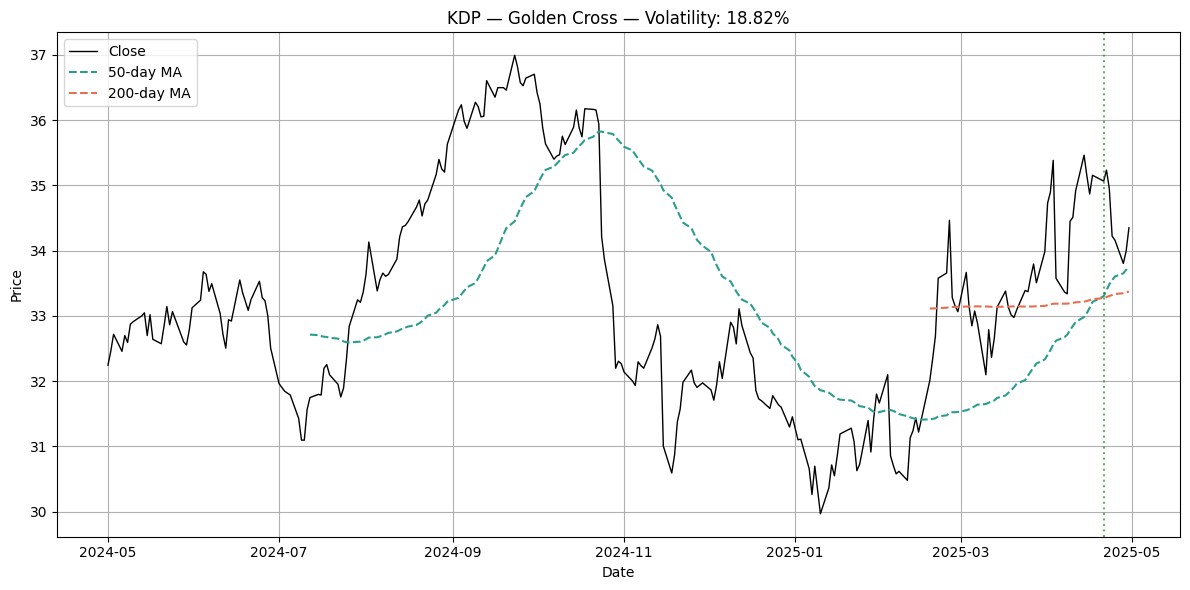

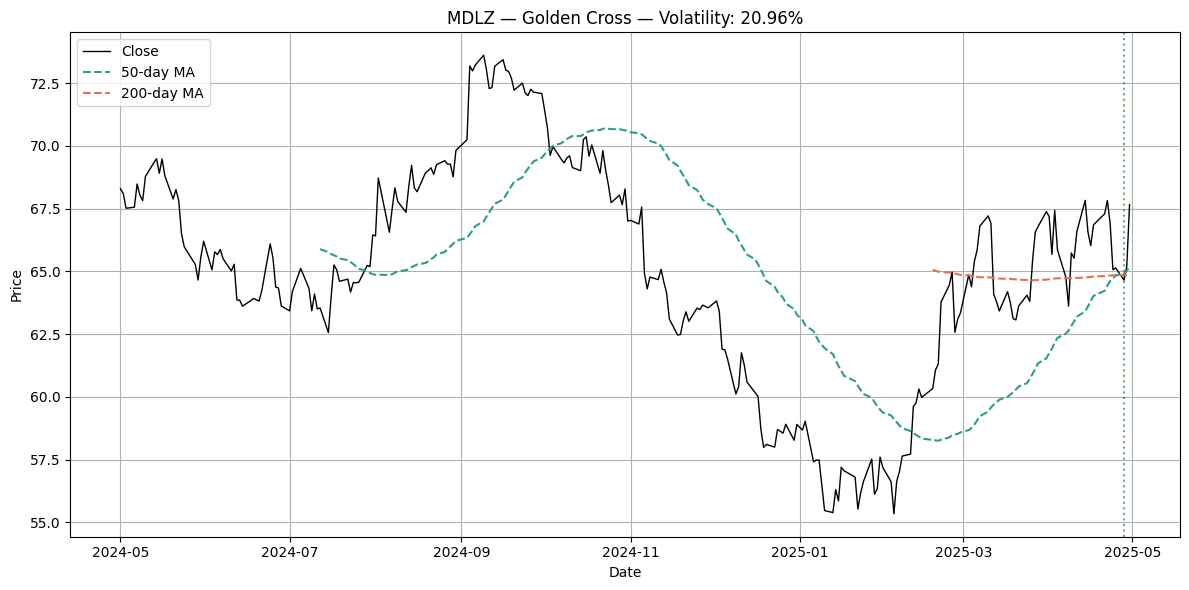

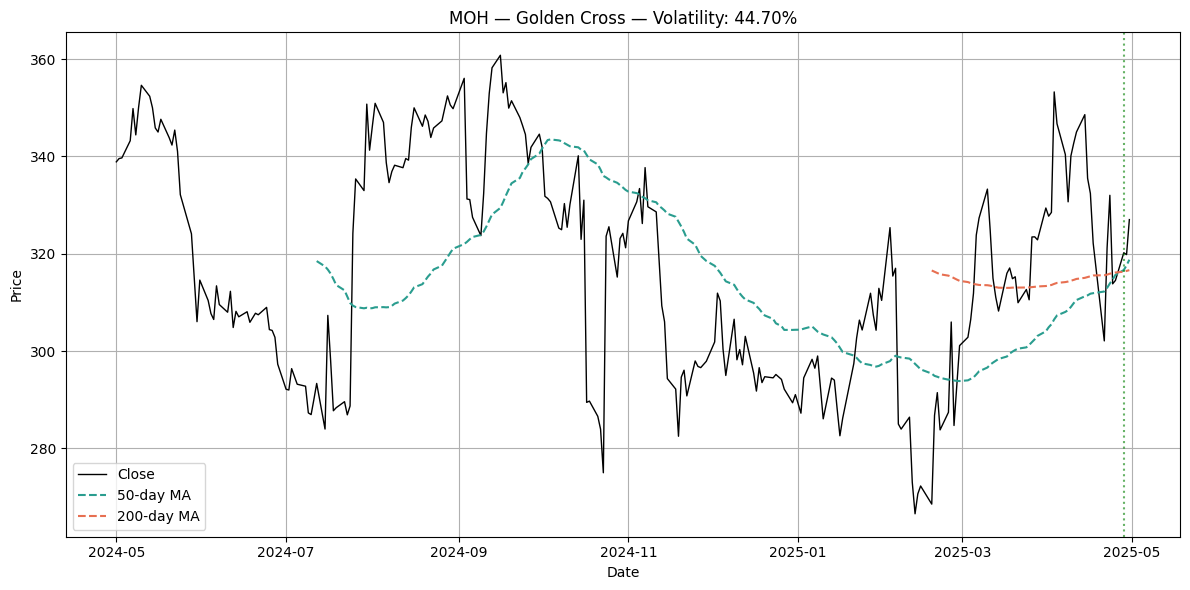

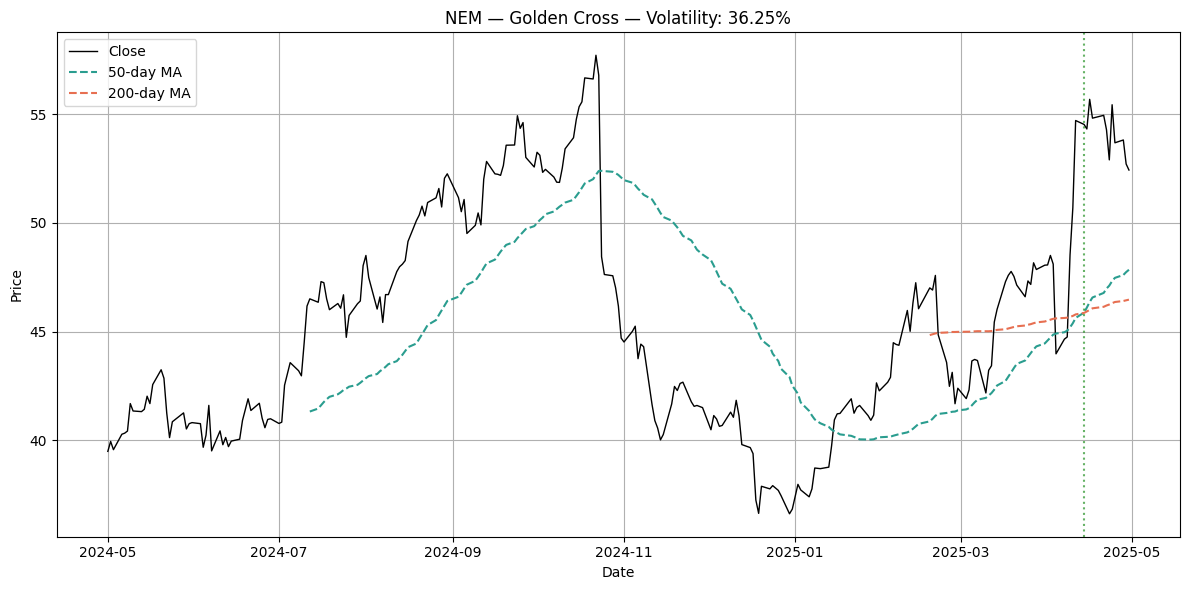

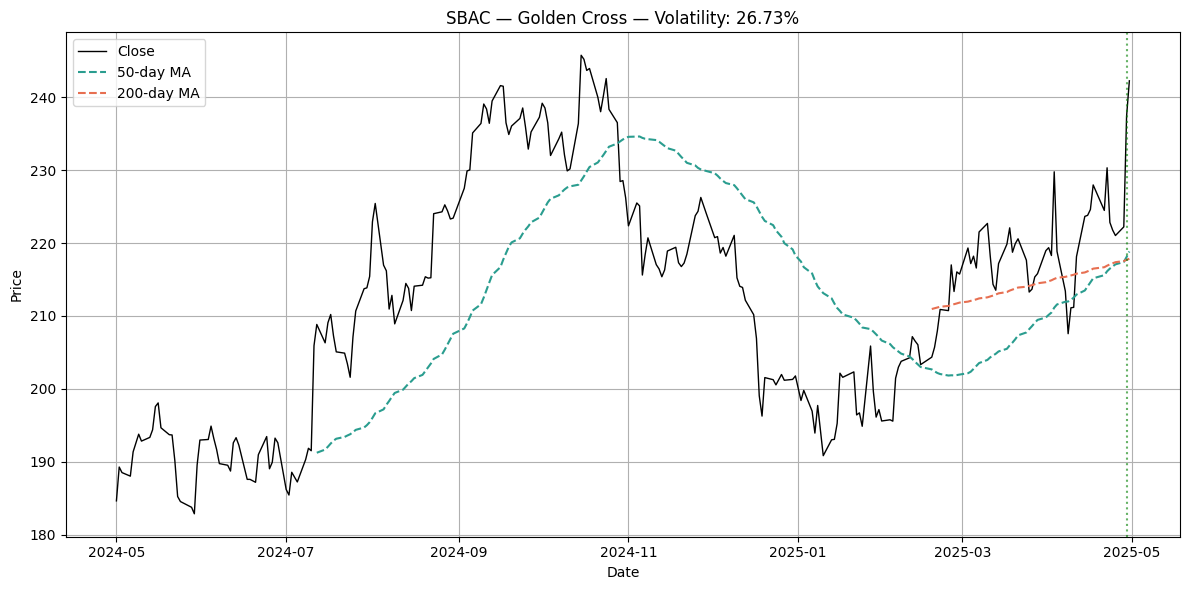

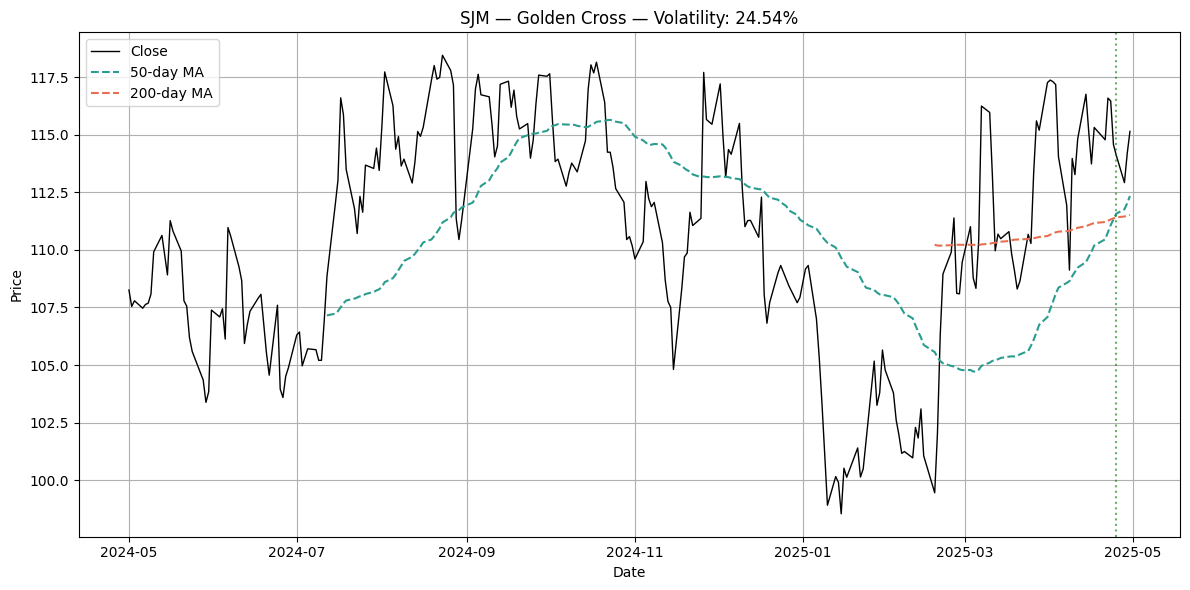

In [23]:
# CODE HERE
# Visualize the results here

# Sort the golden cross tickers alphabetically and select top 10
top_10_golden = df_golden_cross_14d.sort_values(by='TICKER').head(10)['TICKER'].tolist()

for ticker in top_10_golden:
    cross_dates = df_golden_cross_14d[df_golden_cross_14d["TICKER"] == ticker]["DATE"].tolist()
    plot_crosses_with_volatility(ticker, df_close, df_ma50, df_ma200, volatility, cross_dates, "Golden Cross")


### Plot top 10 stocks that had Death Crosses in the last 14 days

You should have 10 plots (use a for loop) for every stock in the top 10 (in alphabetical order)
For each plot, put the volatility of the stock in the title of the plot

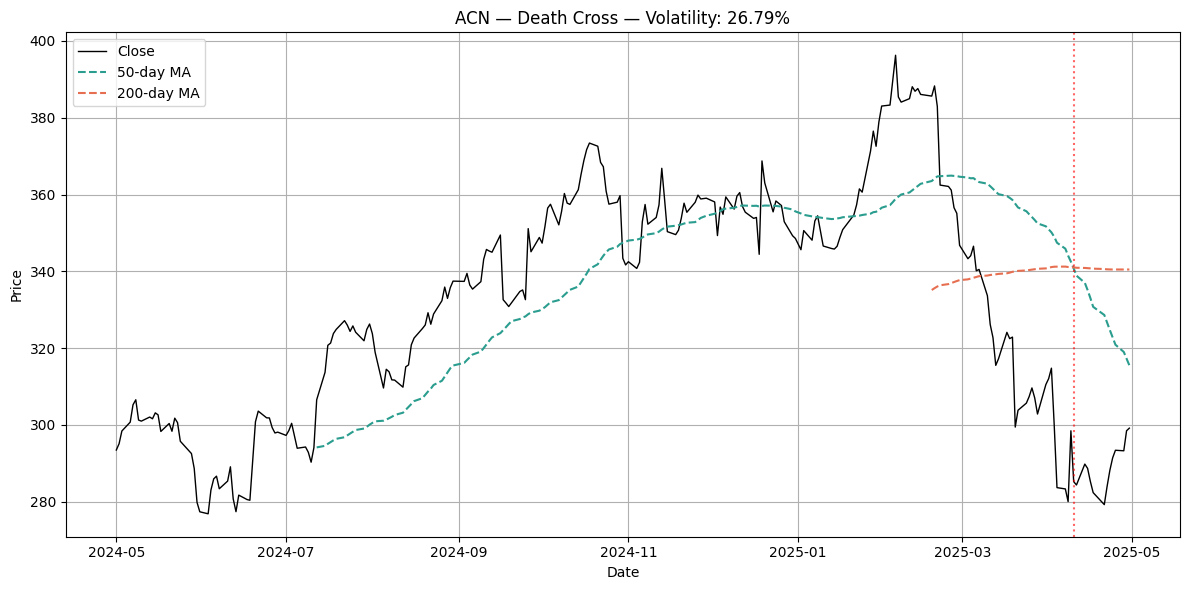

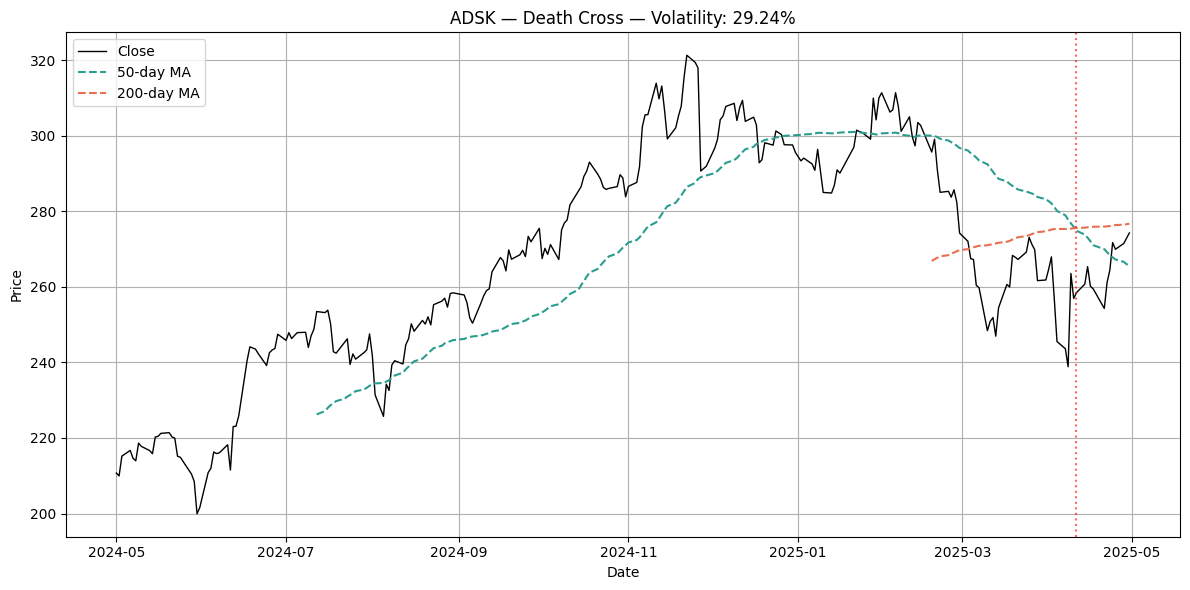

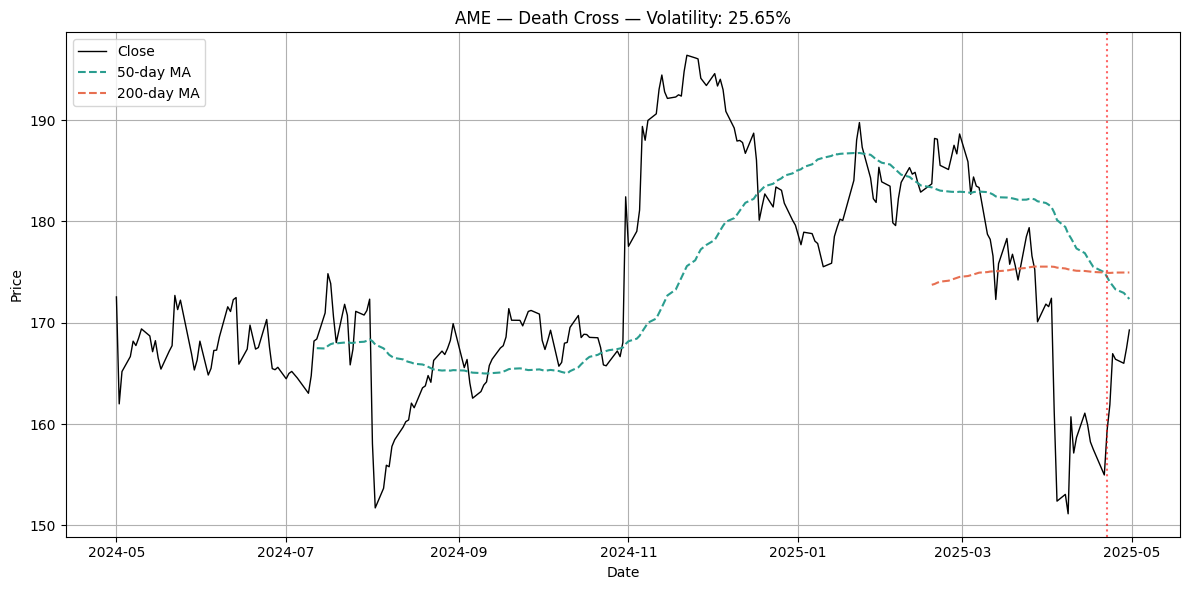

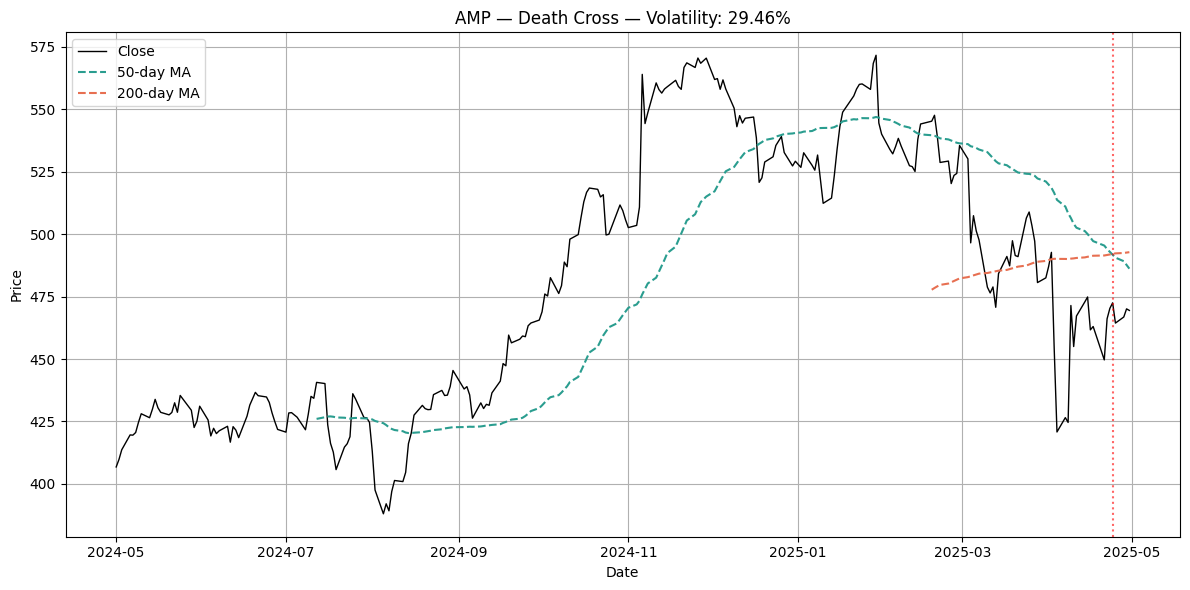

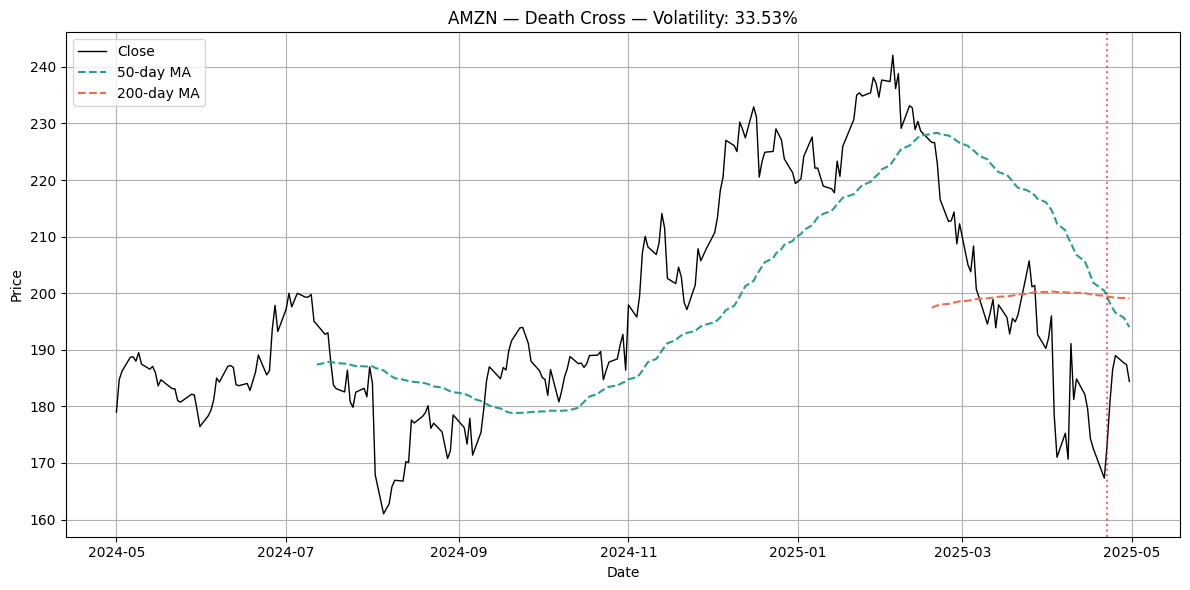

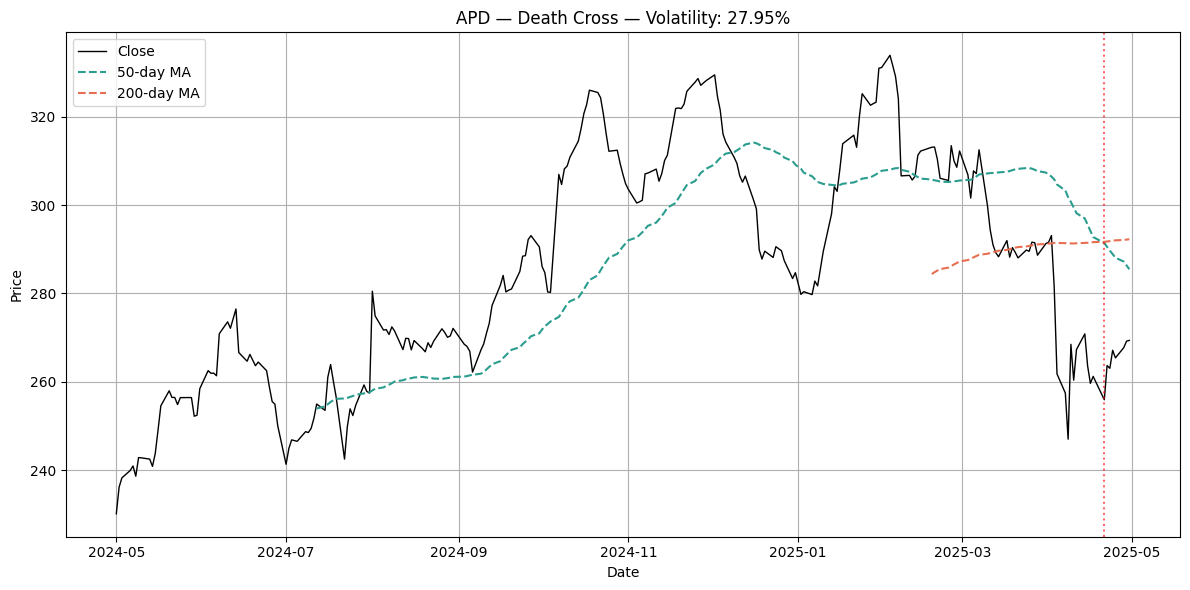

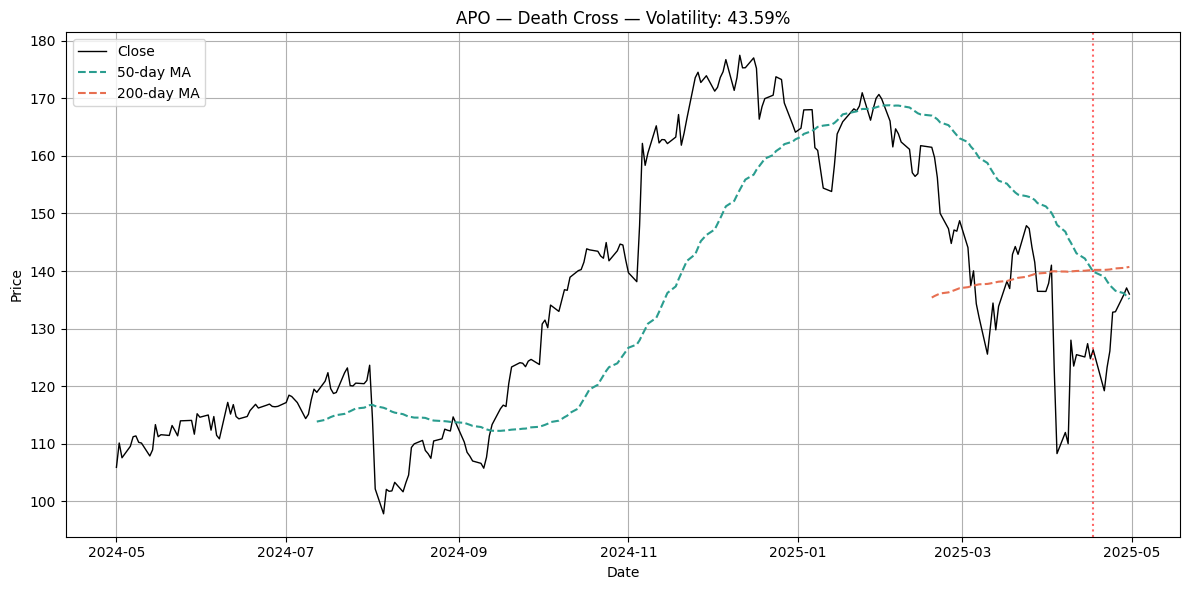

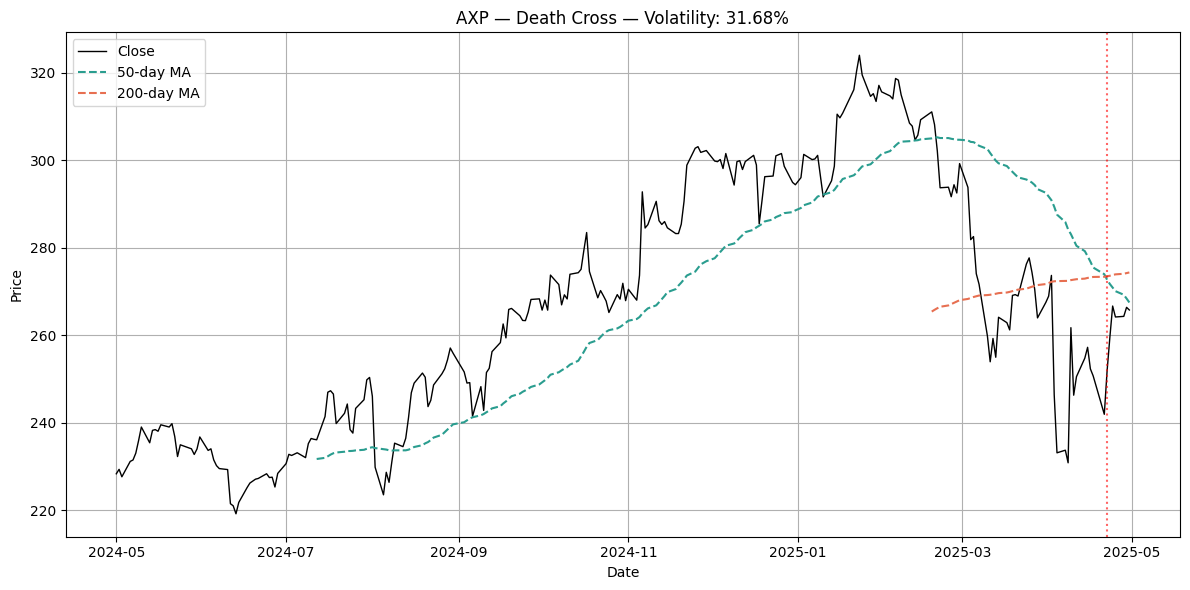

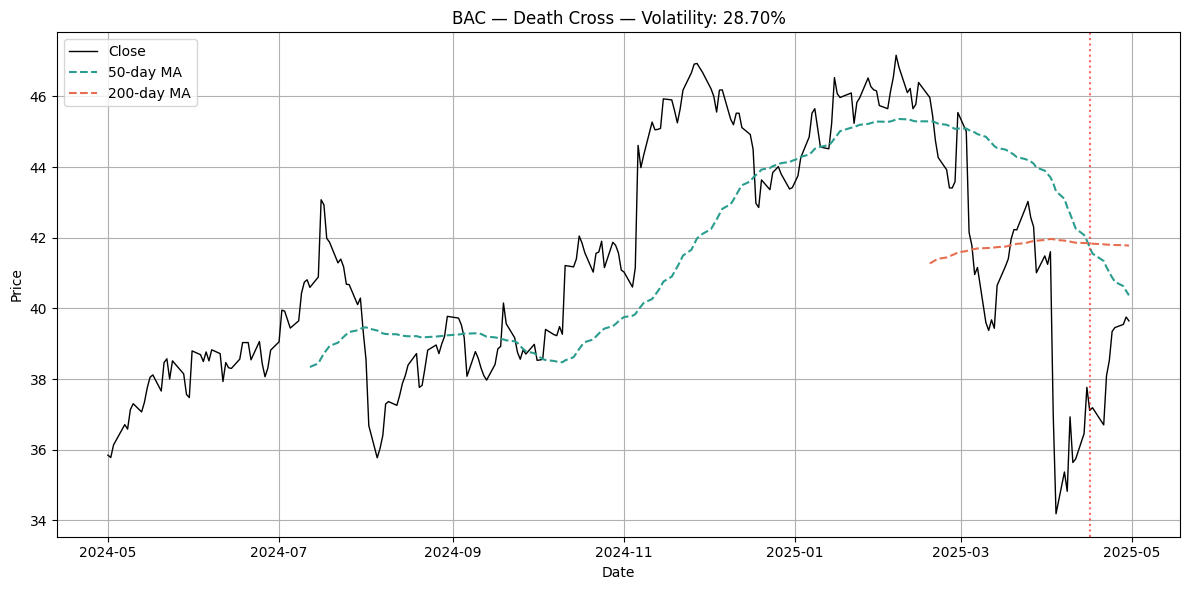

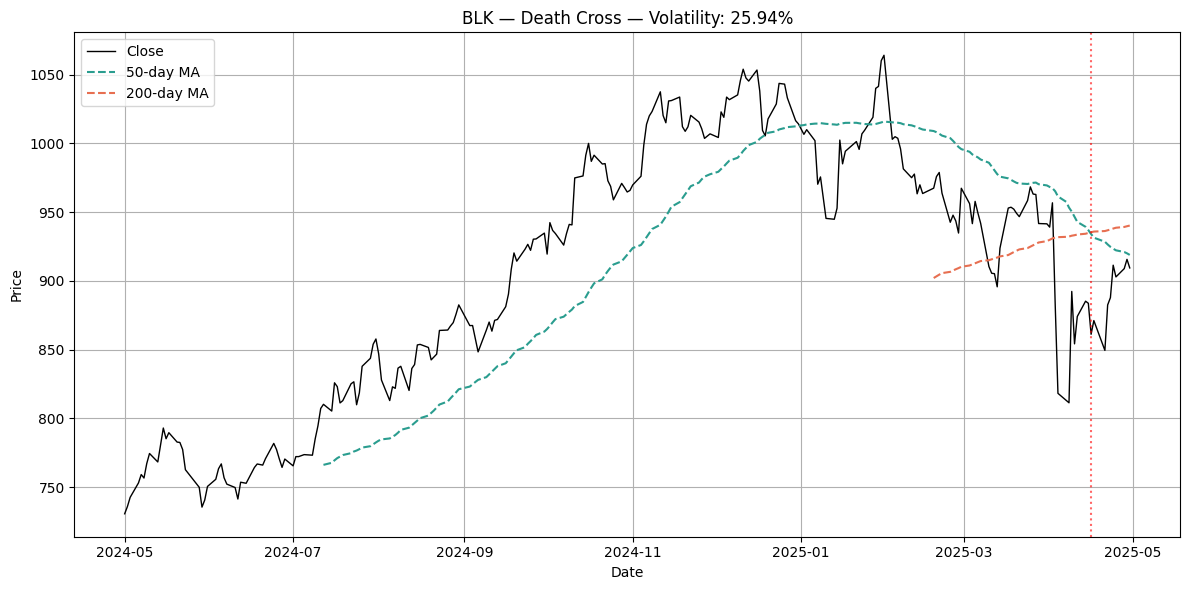

In [24]:
# CODE HERE
# Visualize the results here

# Sort the death cross tickers alphabetically and select top 10
top_10_death = df_death_cross_14d.sort_values(by='TICKER').head(10)['TICKER'].tolist()

# Plot death crosses with volatility
for ticker in top_10_death:
    cross_dates = df_death_cross_14d[df_death_cross_14d["TICKER"] == ticker]["DATE"].tolist()
    plot_crosses_with_volatility(ticker, df_close, df_ma50, df_ma200, volatility, cross_dates, "Death Cross")

## Question section

### Understanding concepts

#### What is a Golden Cross and what does it typically signal to investors?


> A Golden Cross is a chart pattern in technical analysis that happens when a short-term moving average, such as the 50-day, crosses above a long-term moving average like the 200-day. This pattern is commonly viewed as a strong bullish signal. It suggests that upward momentum is increasing and that a longer-term uptrend may be beginning.  
> For investors, a Golden Cross can indicate a shift in market sentiment and is often seen as a good opportunity to consider buying, since it implies that prices could continue to rise.



#### What is a Death Cross and how might market participants react to it?

> A Death Cross is the opposite of a Golden Cross. It occurs when a short-term moving average, like the 50-day, crosses below a long-term moving average, such as the 200-day. This pattern is generally seen as a bearish signal, suggesting that downward momentum is building and that a longer-term downtrend may be underway.  
> Market participants often view a Death Cross as a warning sign of potential weakness ahead. As a result, some investors may reduce their exposure to riskier assets, take profits, or avoid entering new long positions, anticipating that prices could continue to decline.


#### Why might moving averages (MA50, MA200) be used as indicators in technical analysis?

> Moving averages like the MA50 and MA200 are key tools in technical analysis because they smooth price data, highlight trend direction, and act as dynamic support and resistance levels. They are widely used to generate trading signals (especially through crossovers, such as the Golden and Death Cross) which help interpret shifts in market sentiment.  
> The MA50 reflects intermediate momentum, capturing around two months of trading, while the MA200 offers a long-term view, based on roughly a year of data. Though they are lagging indicators, their ability to filter noise and adapt across timeframes makes them essential for analyzing price trends and making informed trading decisions.

#### Why are the last 14 days used to check for crosses? What are the implications of this choice?

> Using the last 14 days to check for Golden or Death Crosses provides a balanced timeframe, since it's short enough to capture recent price movements but long enough to filter out short-term noise. This window helps highlight potential trend shifts and stocks that may be at a turning point, offering timely signals for short- to medium-term traders. However, focusing only on recent crossovers might miss broader, longer-term reversals or generate false positives during volatile periods.

#### How does volatility (e.g., measured using percentage change standard deviation) help contextualize the price movement around crosses?

> It helps assess the reliability of crossovers. In low-volatility environments, crossovers are more likely to reflect genuine trend shifts. In contrast, high volatility can produce false signals due to sharp, short-term price swings. By adding context, volatility helps traders distinguish between noise and meaningful movement.

### Backtesting and evaluation

#### How would you measure whether Golden Crosses actually lead to profitable trades?

> To determine if Golden Crosses lead to profitable trades, we can backtest the strategy by simulating trades on historical data. It’s important to clearly define entry and exit rules, including stop-losses and take-profits, across specific assets and timeframes. Once trades are simulated, we should evaluate performance using key metrics like net profit, win rate, and risk-adjusted returns to assess the strategy’s effectiveness.

#### What are the risks of using only technical indicators like moving averages without incorporating fundamentals?

> Relying only on technical indicators (like moving averages) can lead to false signals, as they ignore a company's financial health and broader market context. Without fundamentals, traders risk acting on trends that don't reflect underlying value, increasing exposure to unexpected losses. Combining both approaches offers a more complete and reliable strategy.

#### How would you improve this strategy to reduce false signals (e.g., a Golden Cross that doesn’t lead to a price increase)?

> We can validate the crossover with strong volume and bullish momentum indicators, look for price action confirmation such as breakouts from resistance or bullish patterns, and consider fundamental analysis to validate the underlying asset's health.

### AI Integration


#### Could sentiment from news (future project part) help validate or invalidate these technical signals?

> Yes, news sentiment can support or challenge technical signals by providing the "why" behind price movements. Positive sentiment may reinforce bullish patterns like a Golden Cross, while negative sentiment could flag potential false positives, providing an essential contextual layer.

### Critical thinking

#### From a trading perspective, is this strategy actionable on its own?

> From a trading perspective, this strategy isn’t fully actionable on its own. Golden and Death Crosses can highlight possible trend changes, but acting on them alone could lead to false signals or poorly timed trades. To improve reliability, we could combine confirmation indicators like volume, basic risk management rules such as stop-losses, and even sentiment analysis to build a more robust trading system.

#### Based on the volatility observed post-Golden Cross, do these crosses consistently predict upward movement?


> Golden Crosses might look promising, but they don’t always lead to consistent upward trends. For example, in the charts we analyzed, AMT showed a mild rise after the cross, while EW stayed mostly flat despite its high volatility. So, even if a Golden Cross hints at momentum, it’s definitely not a guaranteed breakout. Some stocks go up, others just drift sideways.

#### If you had to present this analysis to a portfolio manager, what conclusions would you emphasize? What caveats would you include?

Conclusions in 2 bullet points:

- Golden Crosses may hint at bullish momentum, but in practice, they don’t consistently lead to sustained price increases. Results were mixed across stocks, with some trending upward and others remaining flat or volatile.
- These technical signals work best as part of a broader framework, particularly when combined with sentiment analysis or fundamental indicators to improve timing and filter out noise.

Caveats in 2 or 3 bullet points: 

- Golden Crosses are lagging indicators. By the time they appear, a significant price move may have already happened.
- They’re not reliable in isolation and are especially prone to false signals during sideways or choppy markets.
- This analysis didn’t account for external factors like earnings reports, macro trends, or news flow, all of which could heavily influence stock behavior post-cross.